### TIME SERIES CASE STUDY
#### Business Case
    UK Transport Department collects data of UK Passenger movement from UK to different places. The Transport Department would     like to forecast the total number of passenger’s movement from UK for the next four quarters.

#### Data file to be used
    UK Outward Passengers Movement.xls: UK Outward passengers count from 1996 to 2005

#### What you will learn from this?
    • Time Series Analysis
    • Seasonality Index by using Moving Averages & Centered Moving Averages
    • Calculating Trends
    • Calculating forecast accuracy by using MAD and MAPE etc

### Install & Load Packages


In [1]:
# install.packages("Hmisc")
# install.packages("tidyverse")
# install.packages("dplyr")
# install.packages("lubridate")
# install.packages("pastecs")
# install.packages("outliers")
# install.packages("corrplot") 
# install.packages("rcompanion") 
# install.packages("nortest")
# install.packages("ggplot2")
# install.packages("sqldf")
# install.packages("tseries")
# install.packages("forecast")
# install.packages("xlsx")

In [2]:
library(Hmisc)
library(dplyr)
library(lubridate)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(ggrepel)
library(forcats)
library(scales)
library(tidyr)
library(pastecs)
library(outliers)
library(corrplot)
library(rcompanion)
library(nortest)
library(ggplot2)
library(sqldf)
library(tseries)
library(forecast)
library(xlsx)

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, units


Attaching package: 'dplyr'

The following objects are masked from 'package:Hmisc':

    src, summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.3     v purrr   0.3.2
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x lubridate::as.difftime() masks base::as.difftime()
x lubridate::date()        masks base::date()
x dplyr::filter(

### Import Data into R

In [3]:
uk <- read.xlsx("C:\\Data_Science\\Certifications\\AnalytixLabs\\Data Science in R\\Data Science with R - Final Projects\\Time Series Forecast -  UK Air Travel\\UK Outward Passengers Movement.xls", sheetIndex=1)
head(uk,5)

Year,Quarter,Ireland,Other.EU.not.Ireland.,Rest.of.Europe.and.Med,Rest.of..World,Total
1996,1,708,4084,1233,4198,10222
1996,2,845,6329,1684,4691,13549
1996,3,1053,7617,2075,2887,16632
1996,4,853,4788,1406,4936,11983
1997,1,794,4311,1368,4534,11007


In [4]:
NROW(uk)
NCOL(uk)

[1] 42

[1] 7

In [5]:
str(uk)

'data.frame':	42 obs. of  7 variables:
 $ Year                  : num  1996 1996 1996 1996 1997 ...
 $ Quarter               : num  1 2 3 4 1 2 3 4 1 2 ...
 $ Ireland               : num  708 845 1053 853 794 ...
 $ Other.EU.not.Ireland. : num  4084 6329 7617 4788 4311 ...
 $ Rest.of.Europe.and.Med: num  1233 1684 2075 1406 1368 ...
 $ Rest.of..World        : num  4198 4691 2887 4936 4534 ...
 $ Total                 : num  10222 13549 16632 11983 11007 ...


In [6]:
summary(uk)

      Year         Quarter         Ireland     Other.EU.not.Ireland.
 Min.   :1996   Min.   :1.000   Min.   : 708   Min.   : 4084        
 1st Qu.:1998   1st Qu.:1.250   1st Qu.:1040   1st Qu.: 6364        
 Median :2001   Median :2.000   Median :1158   Median : 7972        
 Mean   :2001   Mean   :2.452   Mean   :1165   Mean   : 8400        
 3rd Qu.:2003   3rd Qu.:3.000   3rd Qu.:1312   3rd Qu.:10178        
 Max.   :2006   Max.   :4.000   Max.   :1656   Max.   :14288        
                                NA's   :2      NA's   :2            
 Rest.of.Europe.and.Med Rest.of..World     Total      
 Min.   :1233           Min.   :2887   Min.   :10222  
 1st Qu.:1681           1st Qu.:5087   1st Qu.:14206  
 Median :2072           Median :5551   Median :16999  
 Mean   :2214           Mean   :5637   Mean   :17494  
 3rd Qu.:2623           3rd Qu.:6362   3rd Qu.:20006  
 Max.   :4405           Max.   :7276   Max.   :27624  
 NA's   :2              NA's   :2      NA's   :2      

In [7]:
describe(uk)

uk 

 7  Variables      42  Observations
--------------------------------------------------------------------------------
Year 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
      42        0       11    0.992     2001    3.577     1996     1997 
     .25      .50      .75      .90      .95 
    1998     2001     2003     2005     2005 
                                                                            
Value       1996  1997  1998  1999  2000  2001  2002  2003  2004  2005  2006
Frequency      4     4     4     4     4     4     4     4     4     4     2
Proportion 0.095 0.095 0.095 0.095 0.095 0.095 0.095 0.095 0.095 0.095 0.048
--------------------------------------------------------------------------------
Quarter 
       n  missing distinct     Info     Mean      Gmd 
      42        0        4    0.938    2.452    1.279 
                                  
Value          1     2     3     4
Frequency     11    11    10    10
Proportion 0.262 0.26

### Handle Missing values

                                      columns tot_cnt na_cnt na_percent
Year                                     Year      42      0   0.000000
Quarter                               Quarter      42      0   0.000000
Ireland                               Ireland      42      2   4.761905
Other.EU.not.Ireland.   Other.EU.not.Ireland.      42      2   4.761905
Rest.of.Europe.and.Med Rest.of.Europe.and.Med      42      2   4.761905
Rest.of..World                 Rest.of..World      42      2   4.761905
Total                                   Total      42      2   4.761905


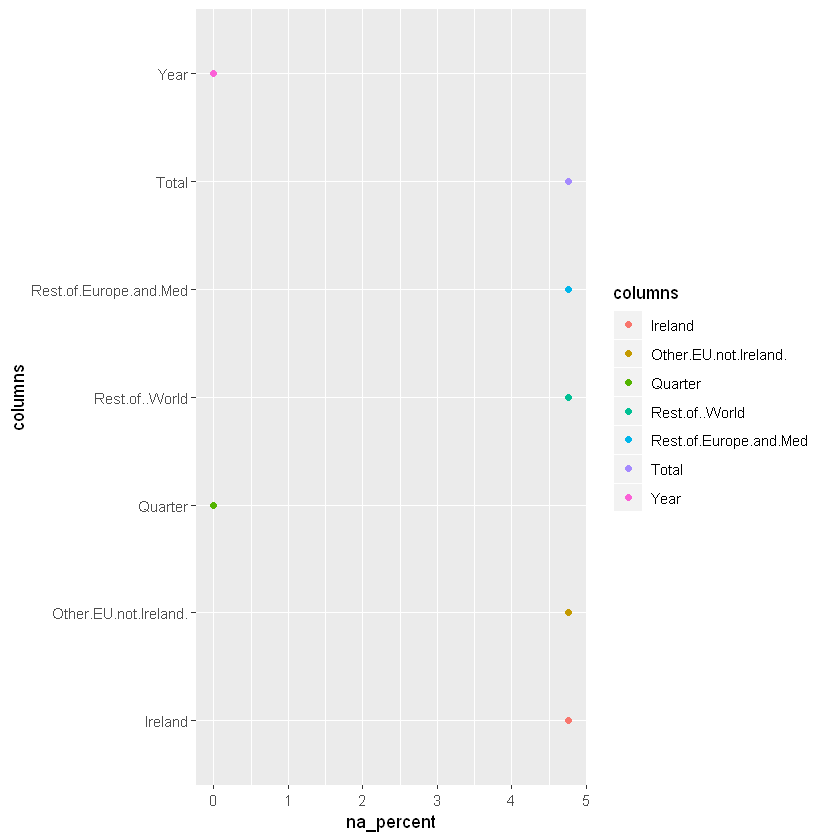

In [8]:
# User-Defined function to find NAs for uk dataframe

findMissingValues <- function(x) {
na_cnt <- colSums(is.na(x))
columns <- colnames(x)   
na_percent <- apply(x, 2, function(col)sum(is.na(col))*100/length(col))
tot_cnt <- apply(x, 2, function(col)length(col))
res <- data.frame(columns,tot_cnt,na_cnt,na_percent)
print(res[order(res$na_percent),])           
gg <- ggplot(data = res, mapping = aes(x = na_percent, y = columns)) + geom_point(alpha = 1, aes(color = columns))
gg              
                 
}

findMissingValues(uk)            

In [9]:
# Drop last 2 rows since they dont have any data 

uk <- uk[!uk$Year==2006,] 


### Treatment of  Outliers

In [10]:
# Create a function that will find and cap the outliers.
# An outlier is considered if it is below the (Q1 – 1.5*IQR) or above (Q3 + 1.5*IQR)
# Or, an outlier is considered if it is below the 5th percentile or above 95th percentile
# We will cap the low and high outliers with 5th and 95th percentile values respectively

HandleOutlier <- function(x,names){
  
   m1 <- mean(x, na.rm = T) 
   cat("\n Mean with outliers:\n", round(m1, 4))
   OutVals = boxplot(x, main="Boxplot with outliers",horizontal = TRUE,col = "red")$out
   cat("\n Pre-treatment Outliers:\n", OutVals)
   
   which(x %in% OutVals)    
#   hist(x, main="Histogram with outliers", xlab=NA, ylab=NA, col="red",)
#   plot(x,xlab="Plot with Outliers", ylab="values", pch="*", col="red", cex=2)

# Method 1: Capping with 5th and 95th percentiles for outliers defined by IQR 
    
#   qnt <- quantile(x, probs=c(.25, .75), na.rm = T)
#   caps <- quantile(x, probs=c(.05, .95), na.rm = T)
#   H <- 1.5 * IQR(x, na.rm = T)
#   x[x < (qnt[1] - H)] <- caps[1]
#   x[x > (qnt[2] + H)] <- caps[2]
    
# Method 2: Capping outliers with 5th and 95th percentiles 
    quantiles <- quantile(x, c(.05, .95), na.rm = T)
    x[ x < quantiles[1] ] <- quantiles[1]
    x[ x > quantiles[2] ] <- quantiles[2]
    
# Method 3: We can replace the outliers with NAs and later impute NAs using MICE or kNN  
    
#  y[x < (qnt[1] - H)] <- NA
#  y[x > (qnt[2] + H)] <- NA
    
# Method 4: Imputation with mean / median / mode
    
#  x[x < (qnt[1] - H)] <- median(x, na.rm = T)
#  x[x > (qnt[2] + H)] <- median(x, na.rm = T)
#  x[x < (qnt[1] - H)] <- mean(x, na.rm = T)
#  x[x > (qnt[2] + H)] <- mean(x, na.rm = T)
#  x[x < (qnt[1] - H)] <- mode(x, na.rm = T)
#  x[x > (qnt[2] + H)] <- mode(x, na.rm = T)
    
   m2 <- mean(x, na.rm = T)
   cat("\n Mean without outliers:\n", round(m2, 4))
   OutVals = boxplot(x, main="Boxplot without outliers",horizontal = TRUE,col = "green")$out
      
   cat("\n Post-treatment Outliers:\n", OutVals)
    
   which(x %in% OutVals)
#   hist(x, main="Histogram without outliers", xlab=NA, ylab=NA, col="green")
#   plot(x,xlab="Plot without Outliers", ylab="values", pch="*", col="green", cex=2)

    return(x)
}


 Mean with outliers:
 1165
 Pre-treatment Outliers:
 
 Mean without outliers:
 1164.185

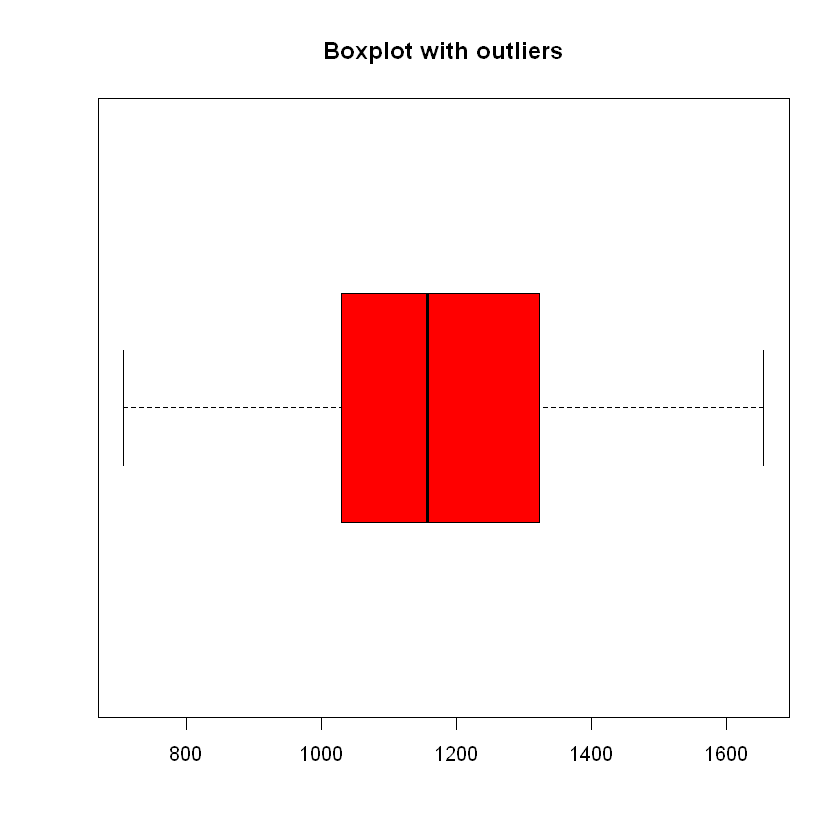


 Post-treatment Outliers:
 

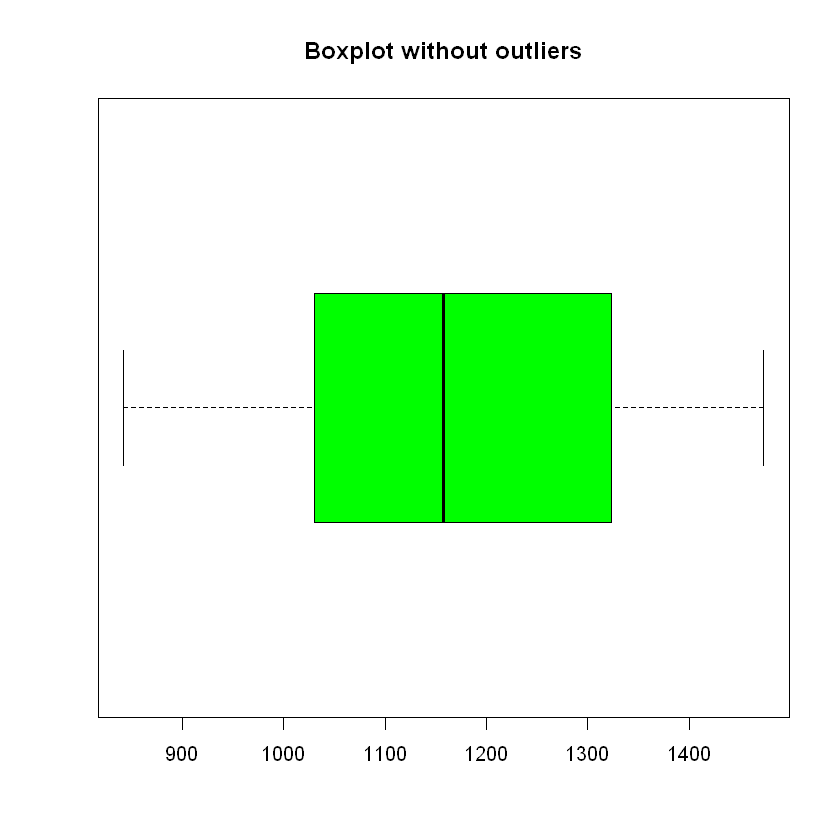

In [11]:
# Check for any outliers
uk$Ireland <- HandleOutlier(uk$Ireland)


 Mean with outliers:
 8399.825
 Pre-treatment Outliers:
 
 Mean without outliers:
 8378.798

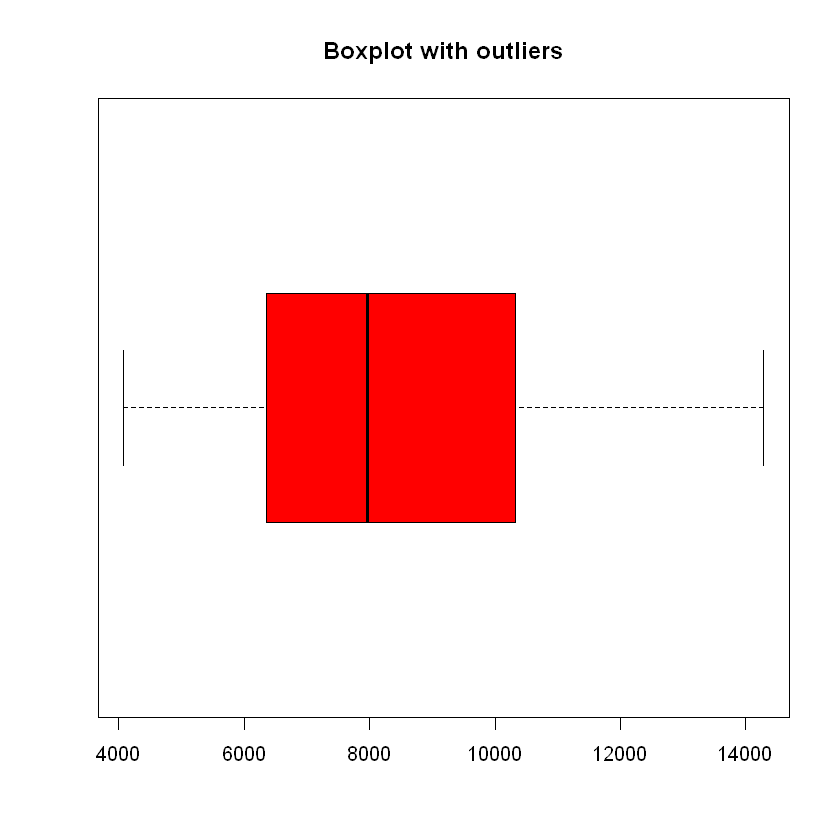


 Post-treatment Outliers:
 

[1]  4501.95  6329.00  7617.00  4788.00  4501.95  6824.00  8267.00  5200.00
 [9]  4512.00  7615.00  9262.00  6128.00  5550.00  8681.00 10606.00  6554.00
[17]  5811.00  9560.00 11585.00  7101.00  6134.00  9369.00 11974.00  6785.00
[25]  6376.00 10036.00 12464.00  7843.00  6833.00 10998.00 13324.00  8488.00
[33]  7353.00 11505.00 13351.00  8862.00  8102.00 11918.00 13351.00  9092.00

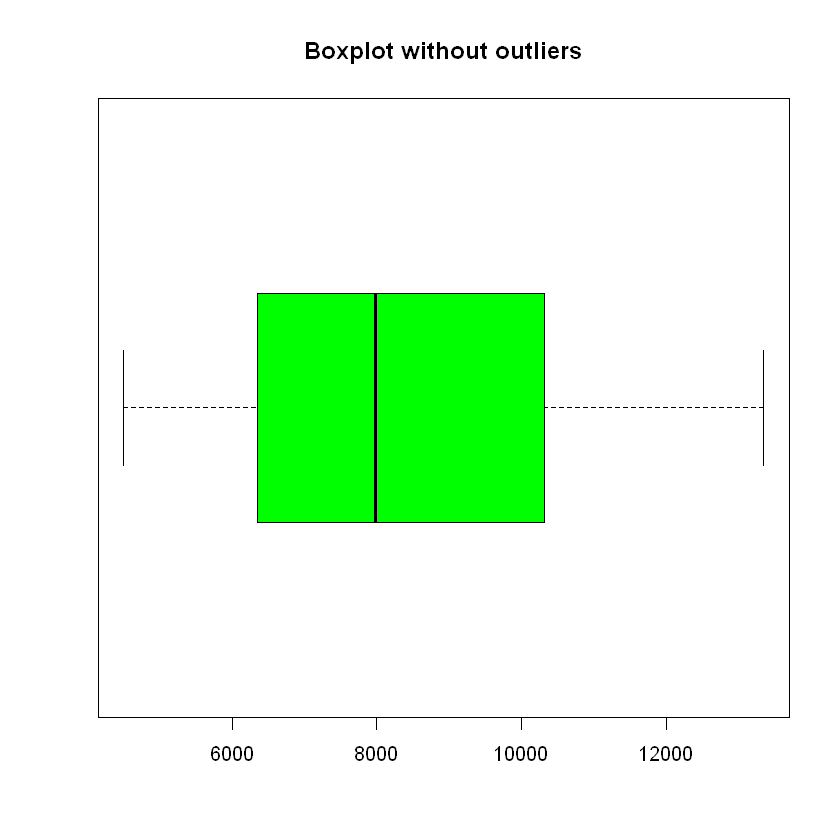

In [12]:
HandleOutlier(uk$Other.EU.not.Ireland.)


 Mean with outliers:
 2213.575
 Pre-treatment Outliers:
 4405
 Mean without outliers:
 2190.885

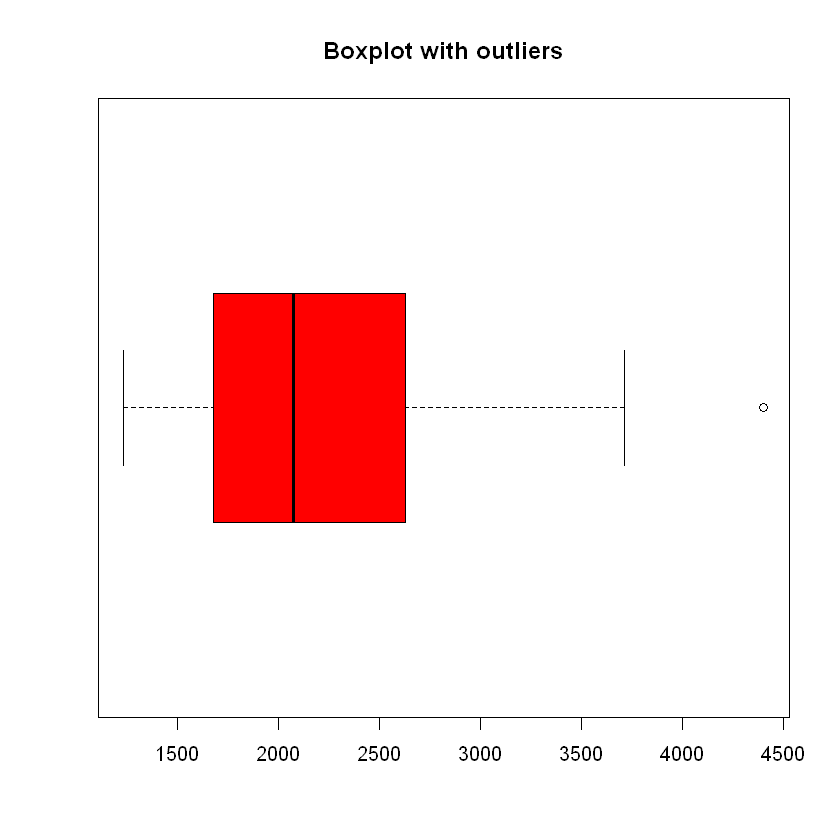


 Post-treatment Outliers:
 

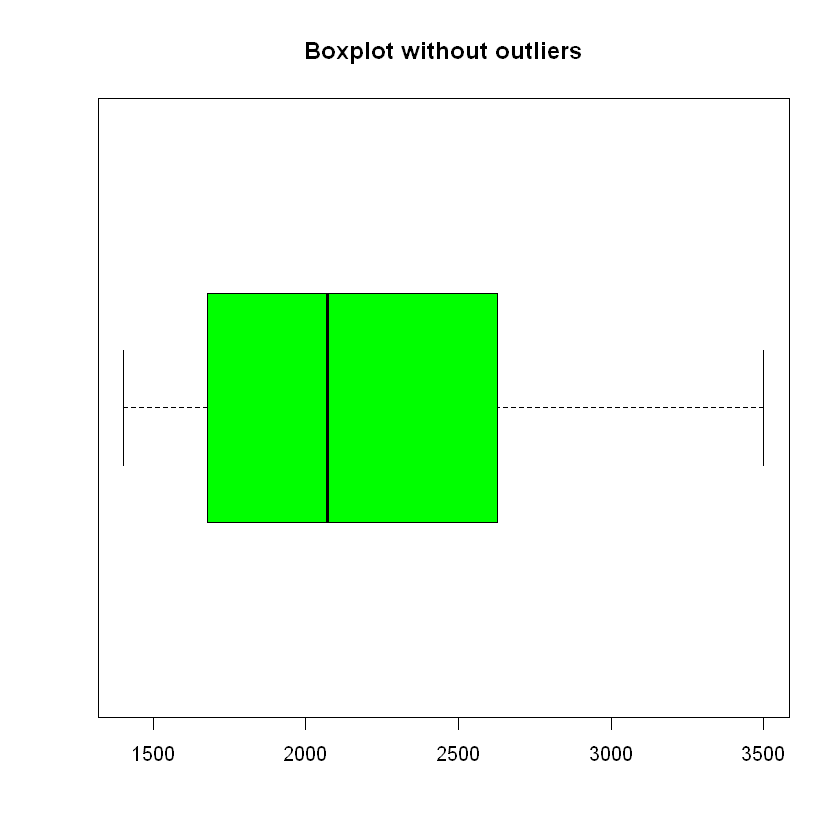

In [13]:
uk$Rest.of.Europe.and.Med <- HandleOutlier(uk$Rest.of.Europe.and.Med)


 Mean with outliers:
 5636.9
 Pre-treatment Outliers:
 2887
 Mean without outliers:
 5679.295

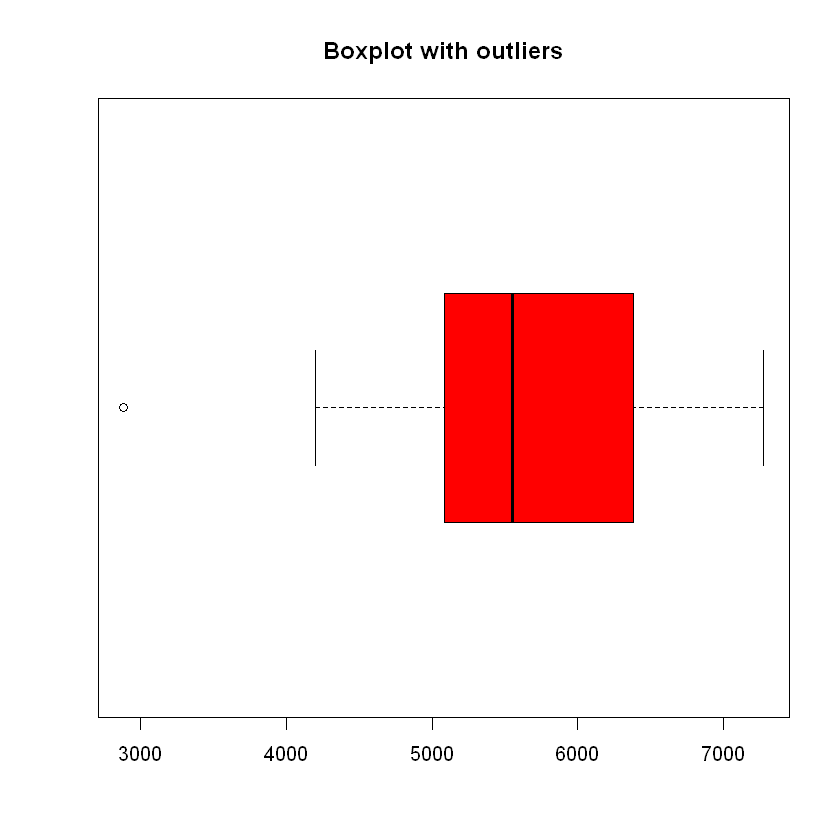


 Post-treatment Outliers:
 

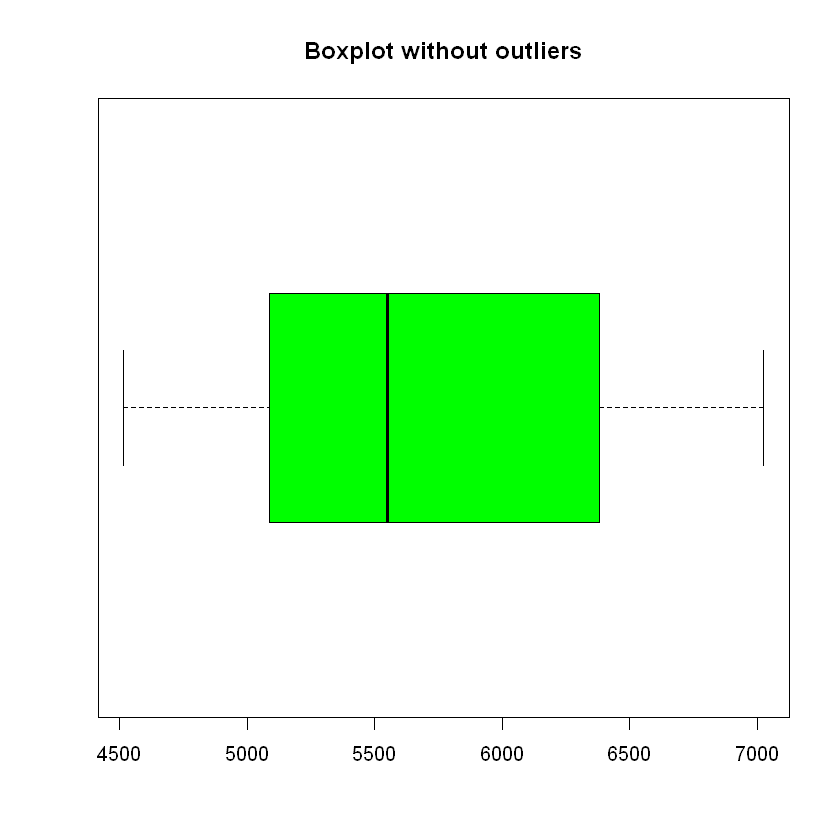

In [14]:
uk$Rest.of..World <- HandleOutlier(uk$Rest.of..World)


 Mean with outliers:
 17494.17
 Pre-treatment Outliers:
 
 Mean without outliers:
 17430.33

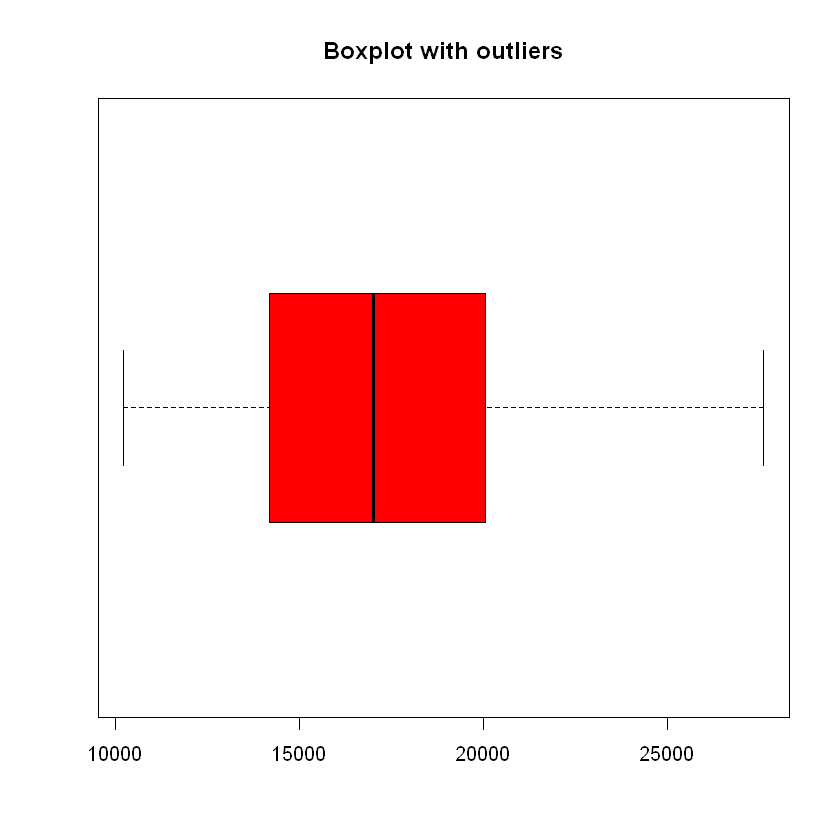


 Post-treatment Outliers:
 

[1] 11756.55 13549.00 16632.00 11983.00 11756.55 14871.00 18108.00 12977.00
 [9] 11796.00 16378.00 19966.00 14154.00 13031.00 17281.00 21118.00 14897.00
[17] 13525.00 18876.00 22726.00 15952.00 14044.00 17870.00 22812.00 14669.00
[25] 14223.00 18751.00 23223.00 16716.00 14693.00 19754.00 24362.00 17943.00
[33] 16083.00 21654.00 24449.55 19171.00 17915.00 22971.00 24449.55 20127.00

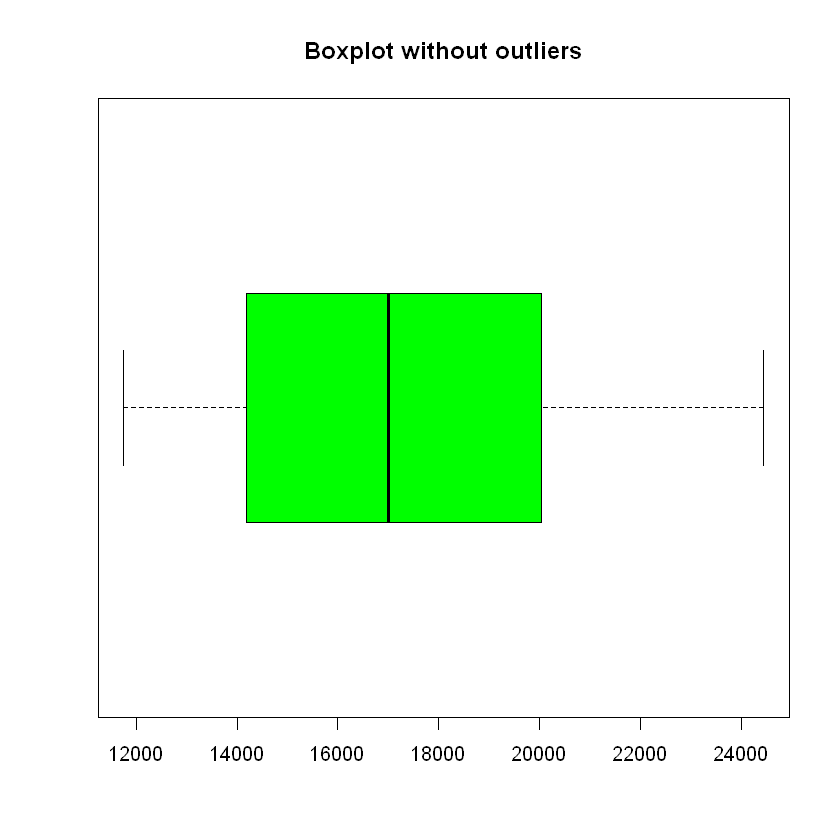

In [15]:
HandleOutlier(uk$Total)

In [16]:
# Couple of columns had outliers  : uk$Other.EU.not.Ireland. and uk$Rest.of..World. These were capped with 5th and 95th percentiles.  
# Total column has no outliers

In [17]:
uk1 <- dplyr::select(uk,Year,Quarter,Total)
head(uk1,5)

Year,Quarter,Total
1996,1,10222
1996,2,13549
1996,3,16632
1996,4,11983
1997,1,11007


### Creating a time series object from uk$Total

In [18]:
# uk$Total is the univariate data which we are converting to time series. start gives the starting time of the data, in this case, its Jan 2011. As it is a quarterly data so ‘frequency=4’.

uk2 <- ts(uk1$Total, start = c(1996,1), frequency = 4)
uk2
# This 'Error in repr_matrix_generic' error only appears in Jupyter. It does nt appear in RStudio

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Qtr1,Qtr2,Qtr3,Qtr4
1996,10222,13549,16632,11983
1997,11007,14871,18108,12977
1998,11796,16378,19966,14154
1999,13031,17281,21118,14897
2000,13525,18876,22726,15952
2001,14044,17870,22812,14669
2002,14223,18751,23223,16716
2003,14693,19754,24362,17943
2004,16083,21654,26113,19171
2005,17915,22971,27624,20127


### Plotting the time series using Base Plot function

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
"plot type 'lines' will be truncated to first character"

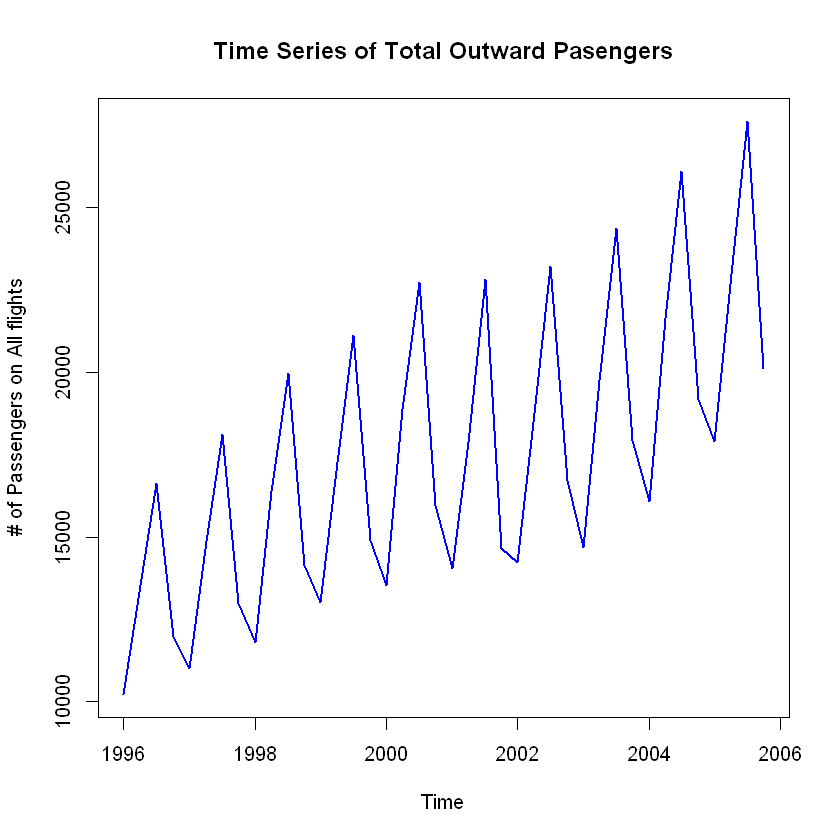

In [19]:
# windows()
plot(uk2, main="Time Series of Total Outward Pasengers",
    type="lines", xlab="Time", ylab="# of Passengers on All flights",
    col="blue", lty=1, lwd=2)

### Plotting the time series using GGPLOT2 autoplot function

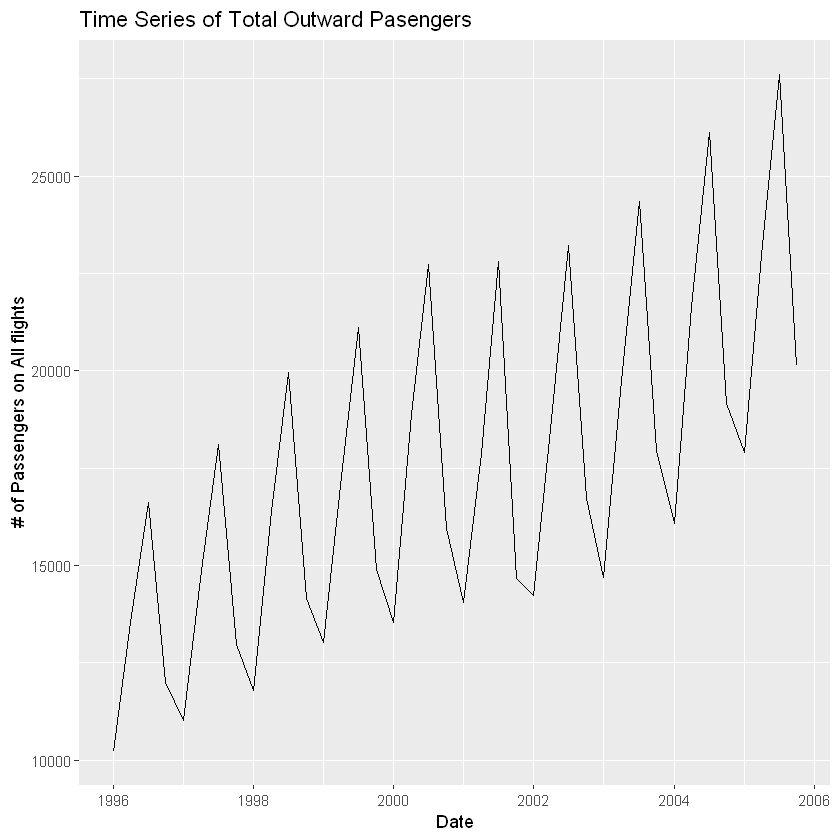

In [20]:
ggplot2::autoplot(uk2) + labs(x ="Date", y = "# of Passengers on All flights", title="Time Series of Total Outward Pasengers") 

### Boxplot

    Let’s use the boxplot function to visualize any seasonal effects.

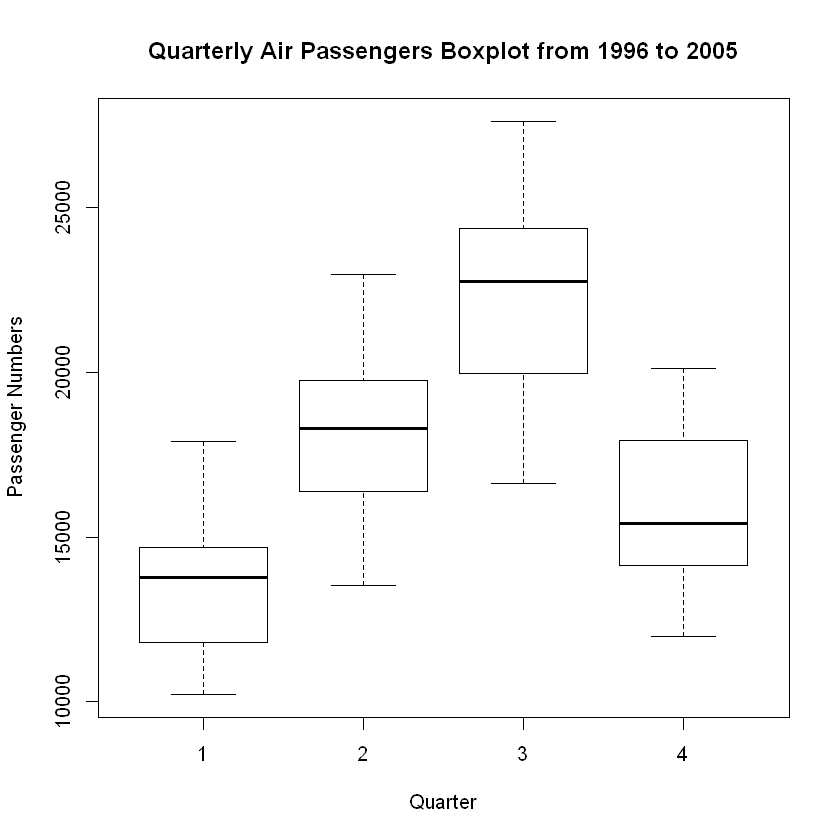

In [21]:
boxplot(uk2~cycle(uk2),xlab="Quarter", ylab = "Passenger Numbers" ,main ="Quarterly Air Passengers Boxplot from 1996 to 2005")

### Conclusion

    We can infer from the graph itself that the data points follows an overall upward trend. The total increases over time with each year which may be indicative of an increasing linear trend, perhaps due to increasing demand for flight travel and commercialisation of airlines in that time period.

    In the boxplot there are more passengers travelling in Q3 with higher means and higher variances than the other quarters, indicating seasonality with a apparent cycle of 4 quarters. The rationale for this could be more people taking holidays and fly over the Q3 months in the UK.

    uk1 appears to be additive time series as the passenger numbers increase, amplitude of the seasonal effect is the same each year.

    There do not appear to be any outliers in the "Total" column and there are no missing values. Therefore no data cleaning is required.


### TIME SERIES DECOMPOSITION

Before performing any EDA on the data, we need to understand the 3 components of a time series data:

    Trend: A long-term increase or decrease in the data is referred to as a trend. It is not necessarily linear. It is the underlying pattern in the data over time.
    
    Seasonal: When a series is influenced by seasonal factors i.e. quarter of the year, month or days of a week seasonality exists in the series. It is always of a fixed and known period. E.g. – A sudden rise in sales during Christmas, etc.
    
    It can appear in two forms: additive and multiplicative.
    
    Cyclic: When data exhibit rises and falls that are not of the fixed period we call it a cyclic pattern. For e.g. – duration of these fluctuations is usually of at least 2 years.


#### Additive models

    In Additive models, there has been an implicit assumption that the different components affected the time series additively. An additive model is linear where changes over time are consistently made by the same amount. A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).

##### Data =  Seasonality + Trend + Cyclical + Residual

    For monthly data, an additive model assumes that the difference between the January and July values is approximately the same each year. In other words, the amplitude of the seasonal effect is the same each year.
    The model similarly assumes that the residuals are roughly the same size throughout the series -- they are a random component that adds on to the other components in the same way at all parts of the series.

#### Multiplicative models

    In Multiplicative models, there has been an implicit assumption that the different components affected the time series additively. A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time.A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.

##### Data =  Seasonality * Trend * Cyclical * Residual
    
    
    To fit a multiplicative model, take logarithms of the data, then analyse the log data as before. After taking logarithms (either natural logarithms or to base 10), the four components of the time series again act additively.

##### log(Data) =  log(Seasonality) + log(Trend) + log(Cyclical) + log(Residual0)

$x
      Qtr1  Qtr2  Qtr3  Qtr4
1996 10222 13549 16632 11983
1997 11007 14871 18108 12977
1998 11796 16378 19966 14154
1999 13031 17281 21118 14897
2000 13525 18876 22726 15952
2001 14044 17870 22812 14669
2002 14223 18751 23223 16716
2003 14693 19754 24362 17943
2004 16083 21654 26113 19171
2005 17915 22971 27624 20127

$seasonal
           Qtr1       Qtr2       Qtr3       Qtr4
1996 -3550.7743   860.0035  4608.5729 -1917.8021
1997 -3550.7743   860.0035  4608.5729 -1917.8021
1998 -3550.7743   860.0035  4608.5729 -1917.8021
1999 -3550.7743   860.0035  4608.5729 -1917.8021
2000 -3550.7743   860.0035  4608.5729 -1917.8021
2001 -3550.7743   860.0035  4608.5729 -1917.8021
2002 -3550.7743   860.0035  4608.5729 -1917.8021
2003 -3550.7743   860.0035  4608.5729 -1917.8021
2004 -3550.7743   860.0035  4608.5729 -1917.8021
2005 -3550.7743   860.0035  4608.5729 -1917.8021

$trend
         Qtr1     Qtr2     Qtr3     Qtr4
1996       NA       NA 13194.62 13458.00
1997 13807.75 14116.50 14339.38 14626.

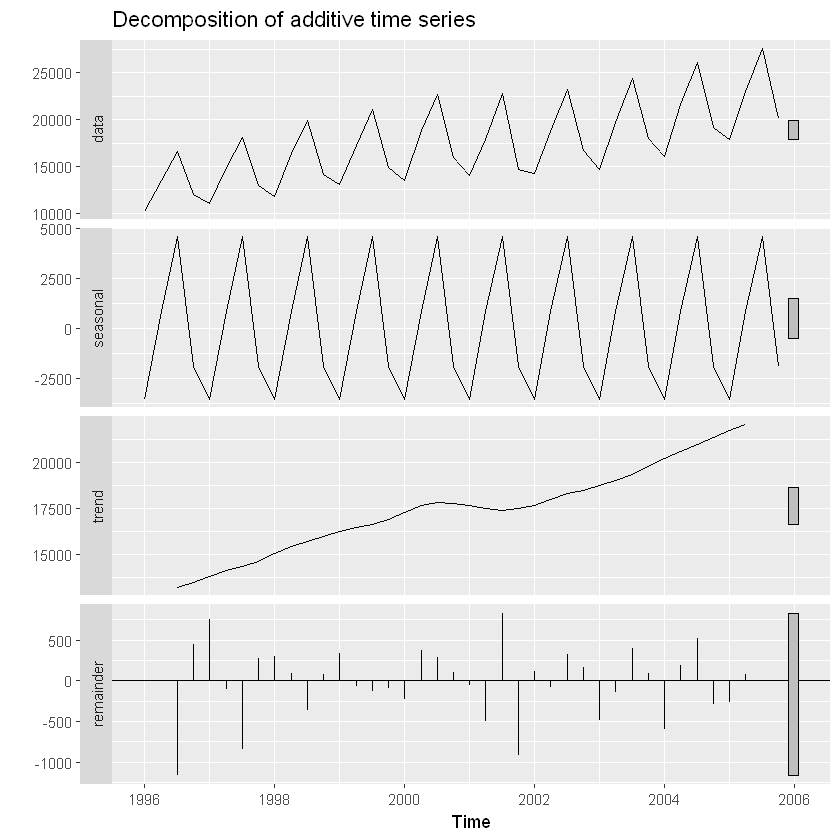

In [22]:
#Here we get 4 components:

# Observed – the actual data plot
# Trend – the overall upward or downward movement of the data points
# Seasonal – any monthly/yearly pattern of the data points
# Residual – unexplainable part of the data

decomposeUKa <- decompose(uk2,"additive")
decomposeUKa
autoplot(decomposeUKa)

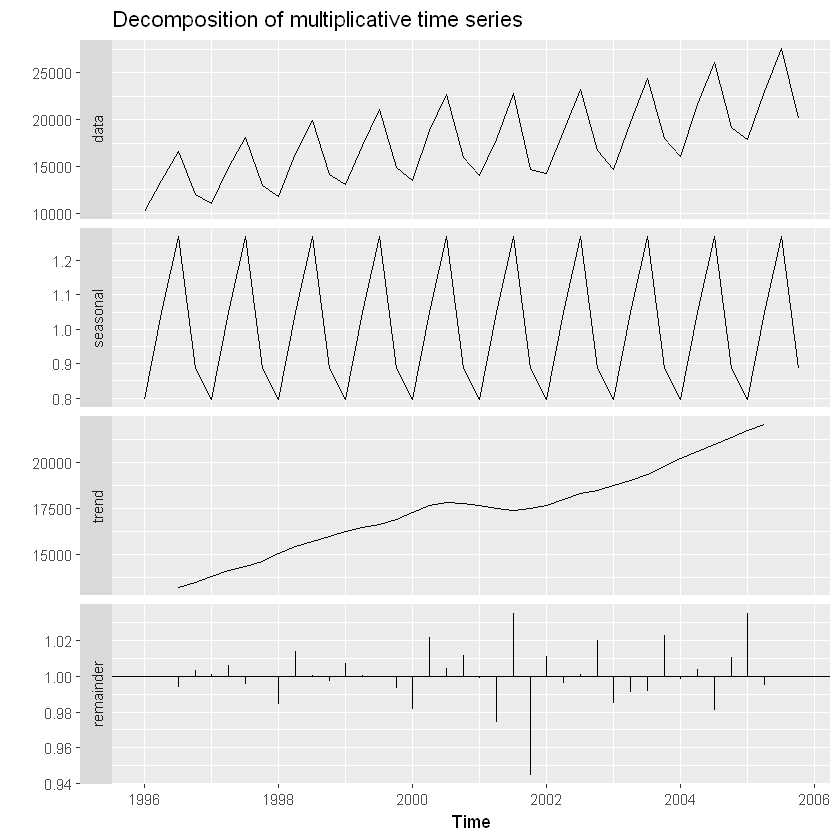

In [23]:
decomposeUKm <- decompose(uk2,"multiplicative")
autoplot(decomposeUKm)

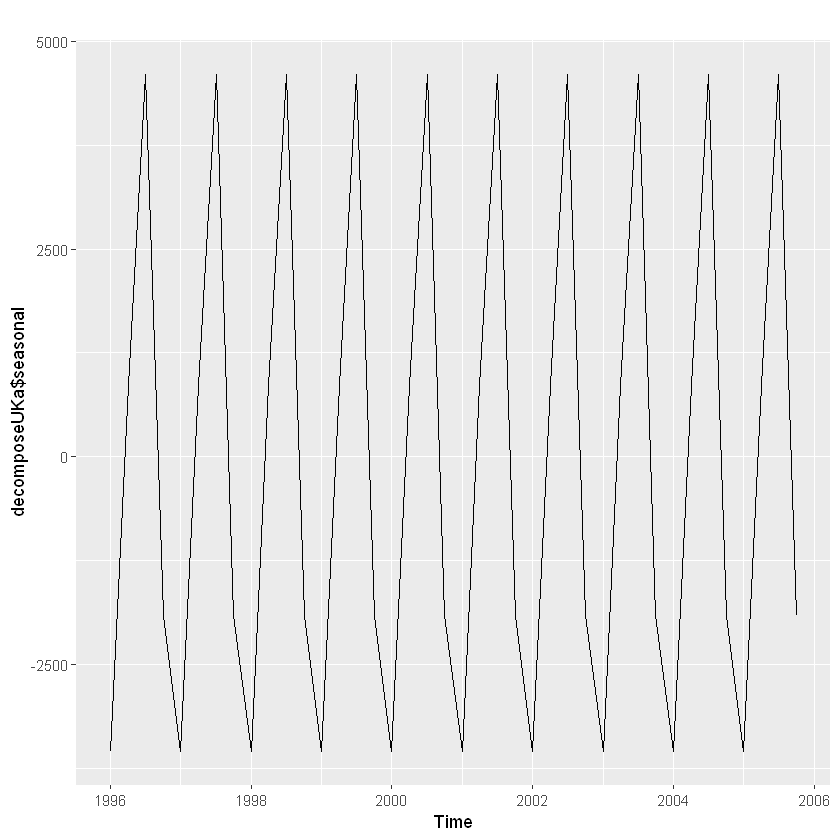

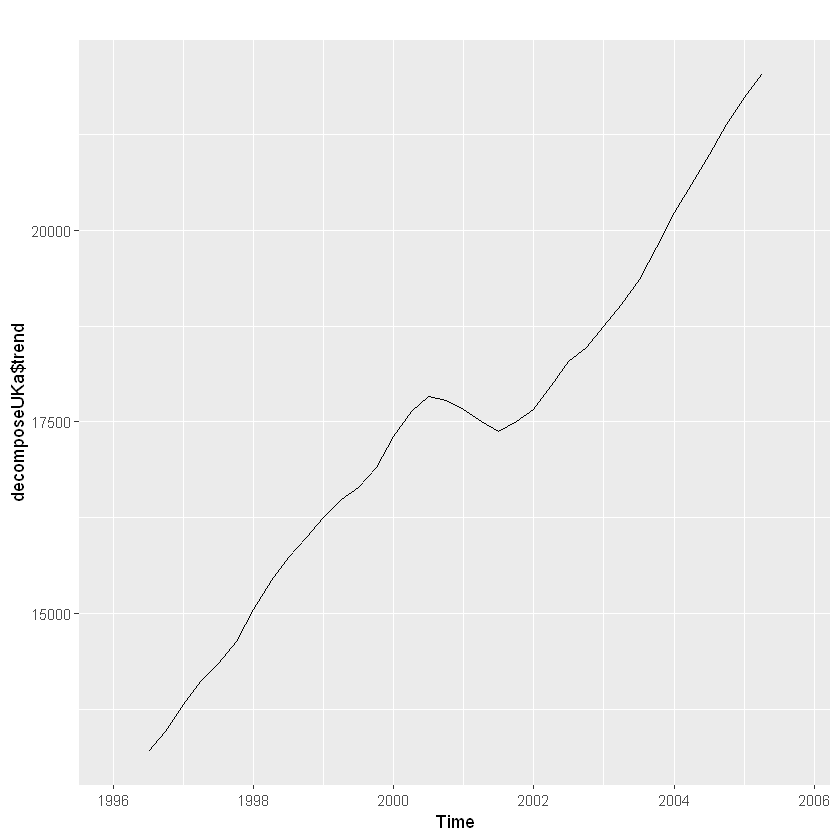

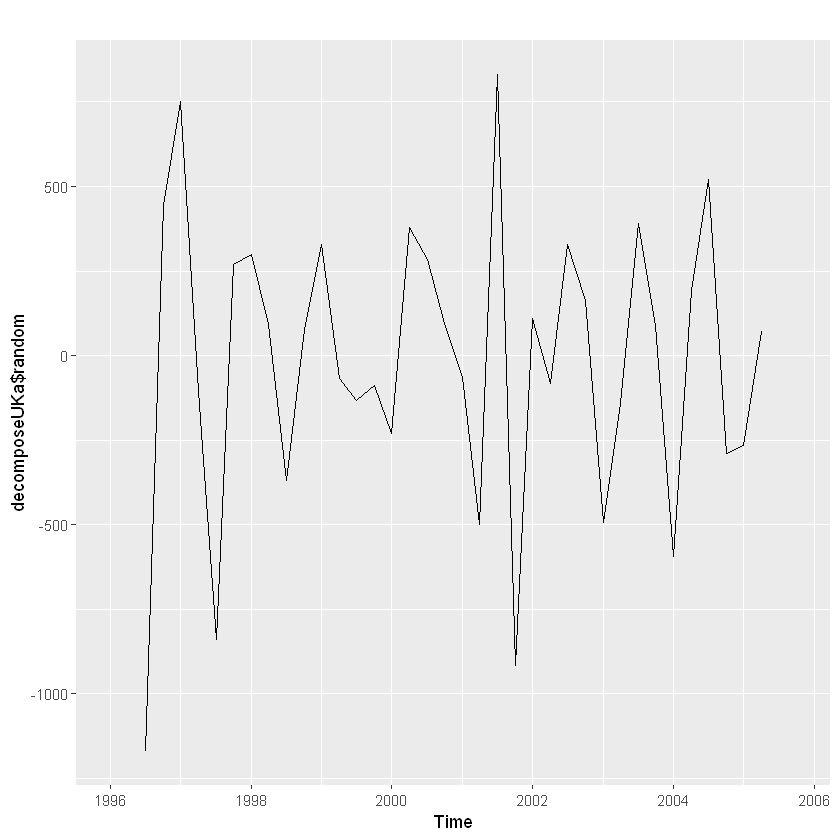

In [24]:
# Extracting the components individually

autoplot(decomposeUKa$seasonal)
autoplot(decomposeUKa$trend)
autoplot(decomposeUKa$random)

#### In these decomposed plots we can again see the trend and seasonality as inferred previously, but we can also observe the estimation of the random component depicted under the “remainder”.

### Trend using Moving Average

As there is seasonality in the time series we will use a 12 period moving average.


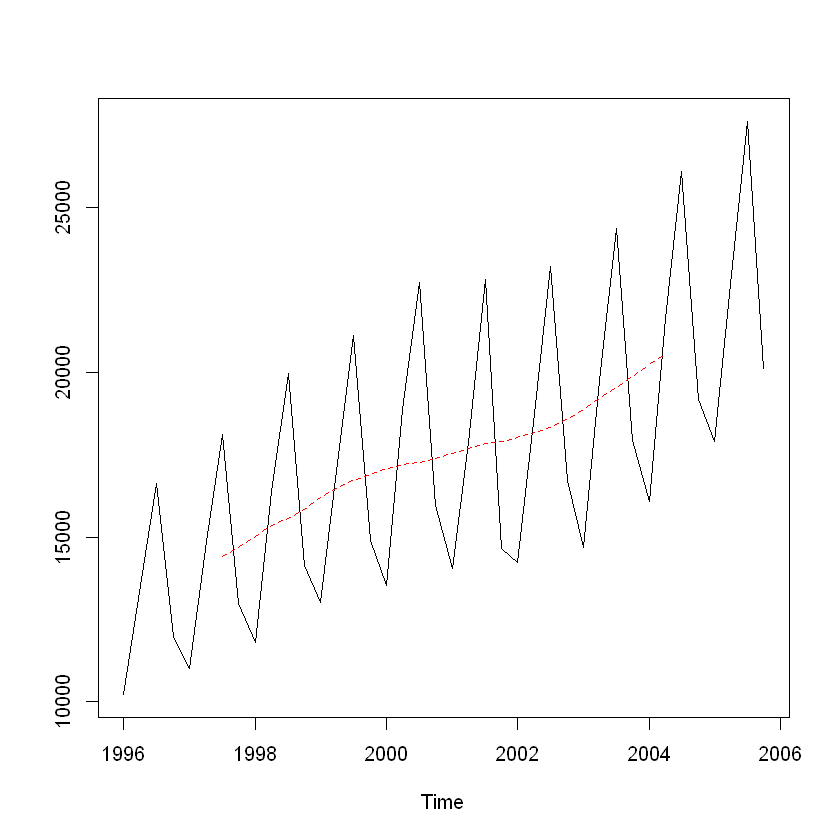

In [25]:
ukma <- ma(uk2, order=12) 
ts.plot(uk2, ukma, lty=c(1:2), col=c('black','red'))

### Plots seasonality indices

[1] -3550.7743   860.0035  4608.5729 -1917.8021 -3550.7743   860.0035
 [7]  4608.5729 -1917.8021 -3550.7743   860.0035  4608.5729 -1917.8021
[13] -3550.7743   860.0035  4608.5729 -1917.8021 -3550.7743   860.0035
[19]  4608.5729 -1917.8021 -3550.7743   860.0035  4608.5729 -1917.8021

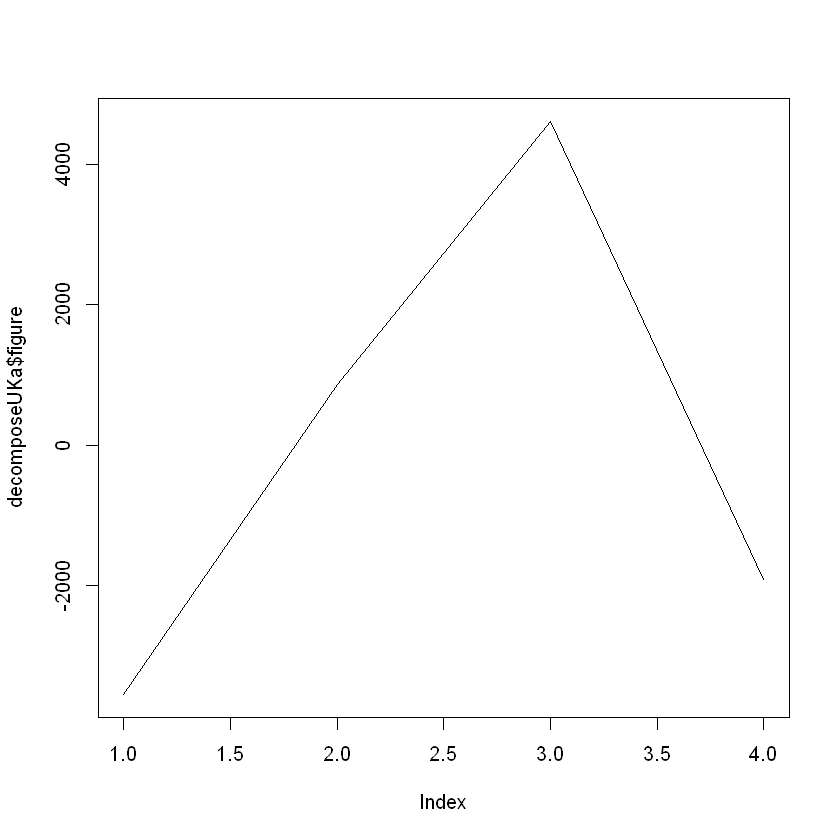

In [26]:
rep(decomposeUKa$figure, 6)
plot(decomposeUKa$figure, type="l") 

### Plot Trend

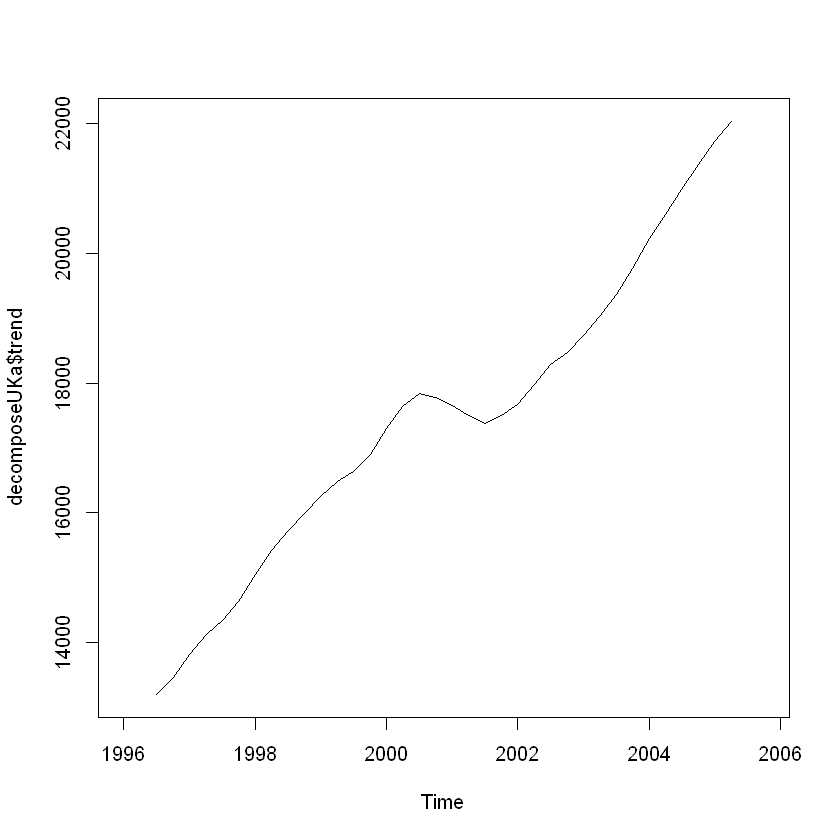

In [27]:
plot(decomposeUKa$trend, type="l") # Plots trend

### Plots random component

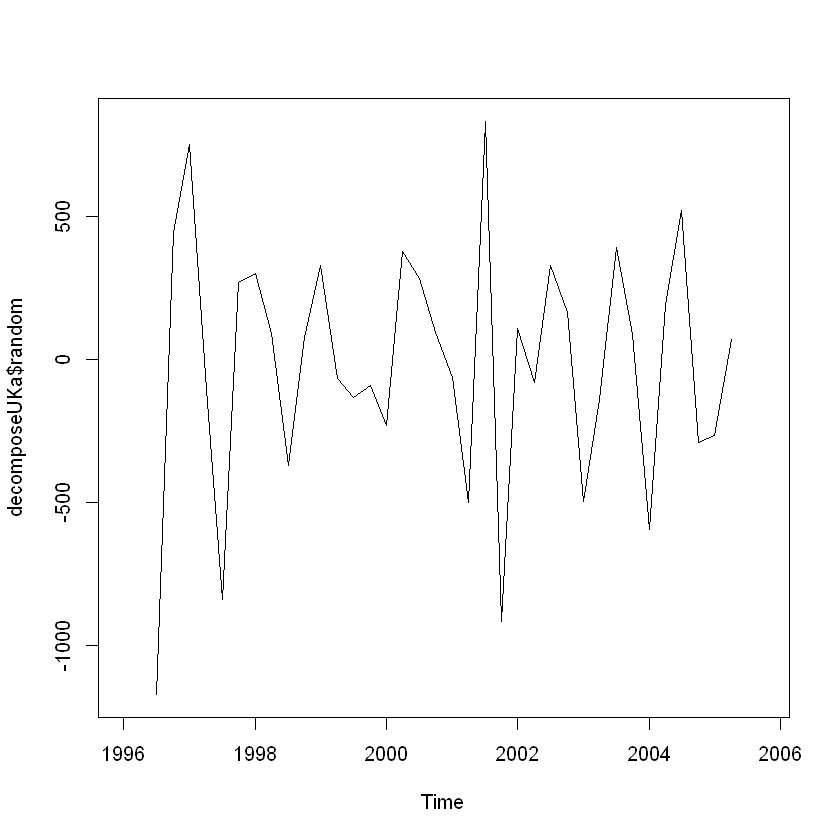

In [28]:
plot(decomposeUKa$random, type="l")

### Reconstruction of the original signal


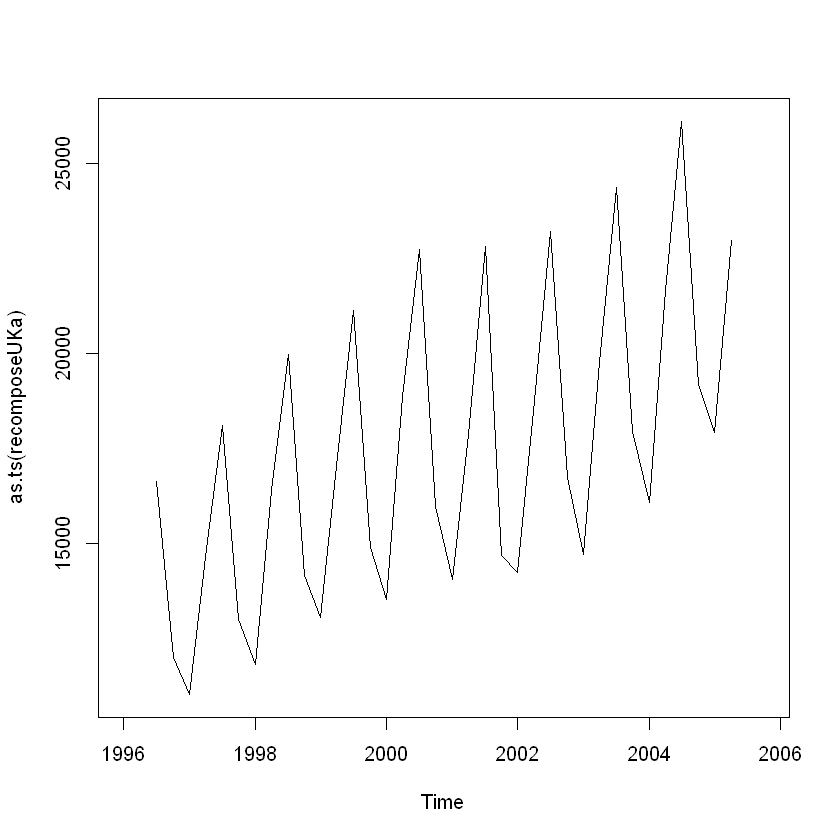

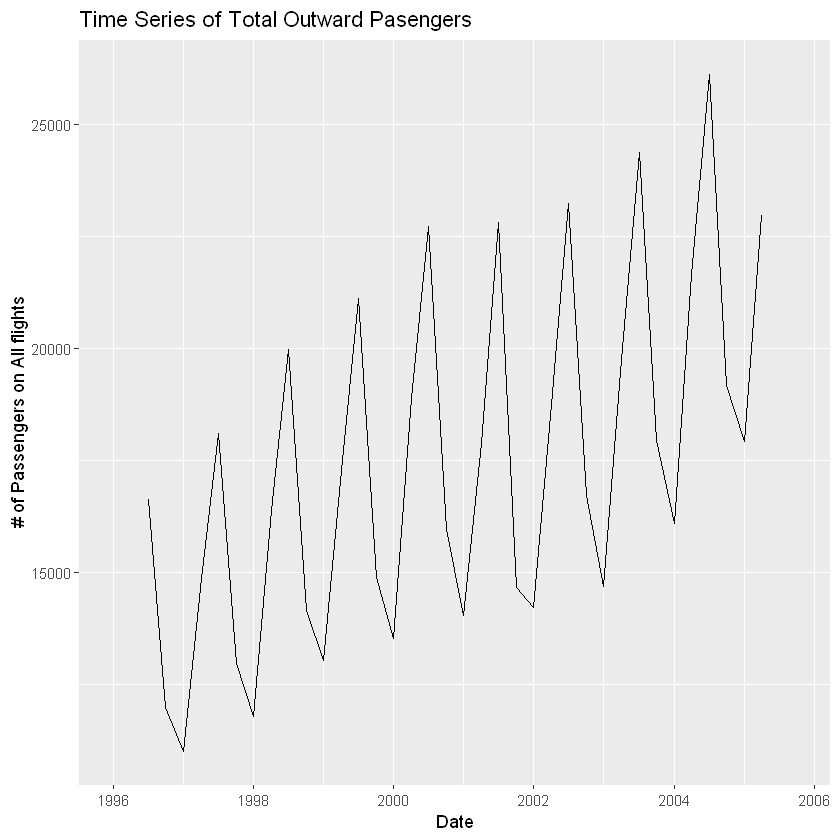

In [29]:
recomposeUKa = decomposeUKa$seasonal + decomposeUKa$trend + decomposeUKa$random
plot(as.ts(recomposeUKa))

ggplot2::autoplot(as.ts(recomposeUKa)) + labs(x ="Date", y = "# of Passengers on All flights", title="Time Series of Total Outward Pasengers")

### Plot Quarterly and Seasonal components

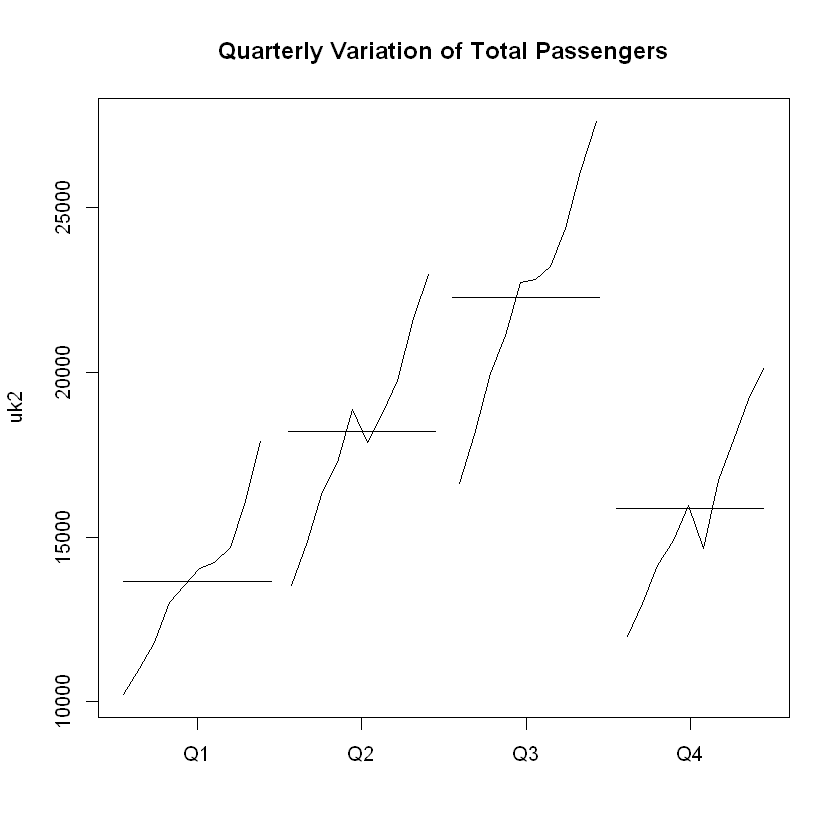

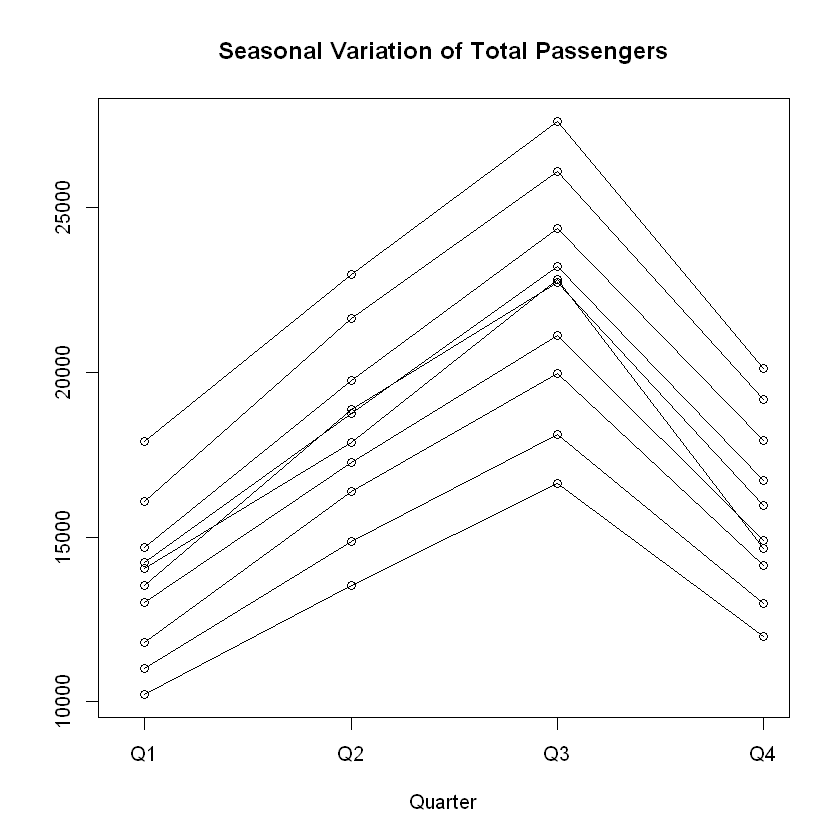

In [30]:
# Plot monthly and seasonal components

monthplot(uk2, main="Quarterly Variation of Total Passengers")
seasonplot(uk2, main="Seasonal Variation of Total Passengers") 


### Test Stationarity Of The Time Series

    A stationary time series has the conditions that the mean, variance and covariance are not functions of time. In order to fit ARIMA models, the time series is required to be stationary. 
    
    To be stationary a time series requires three things:
    
    1. Constant mean across all t (i.e. No trend)
    2. Constant variance across all t (i.e. No seasonality)
    3. Autocovariance between two observations is only dependent on distance between the observations, which we will refer to as the lag h.

We will use 3 methods to test stationarity:
    
    1. Test stationarity of the time series (ADF)
    2. Test stationarity of the time series(KPSS)
    3. Test stationarity of the time series (Autocorrelation)

#### 1. Test stationarity by Augmented Dickey-Fuller(ADF) Test

    In order to test the stationarity of the time series, let’s run the Augmented Dickey-Fuller Test using the adf.test function from the tseries R package.

    First set the hypothesis test:

    The null hypothesis H0 : that the time series is non stationary
    The alternative hypothesis HA : that the time series is stationary

In [31]:
adf.test(uk2) 


	Augmented Dickey-Fuller Test

data:  uk2
Dickey-Fuller = -0.71971, Lag order = 3, p-value = 0.9601
alternative hypothesis: stationary


#### Conclusion

    When the p-value is more than 5%, we strong evidence for the null hypothesis, so we accept the null hypothesis. As per the test results above, the p-value is 0.96 which is > 0.05 therefore we accept the null hypothesis that the time series is non-stationary.

#### 2. Test stationarity by  Kwiatkowski–Phillips–Schmidt–Shin (KPSS) Test

    The Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test figures out if a time series is stationary around a mean or linear trend, or is non-stationary due to a unit root. A stationary time series is one where statistical properties — like the mean and variance — are constant over time.

    H0: The null hypothesis for the test is that the data is stationary.
    Ha: The alternate hypothesis for the test is that the data is not stationary.

In [32]:
kpss.test(uk2) 

Warning message in kpss.test(uk2):
"p-value smaller than printed p-value"


	KPSS Test for Level Stationarity

data:  uk2
KPSS Level = 1.0626, Truncation lag parameter = 3, p-value = 0.01


#### Conclusion

    When the p-value is less than 5%, we reject the Null hypothesis. As per the test results above, the p-value is 0.01 which is < 0.05 therefore we reject the null hypothesis that the time series is stationary.


#### 3. Test stationarity by Autocorrelation

    Autocorrelations or lagged correlations are used to assess whether a time series is dependent on its past. We will use autocorrelation function (acf) in from the base stats R package. This function plots the correlation between a series and its lags ie previous observations with a 95% confidence interval in blue. If the autocorrelation crosses the dashed blue line, it means that specific lag is significantly correlated with current series. Recall that the ACF at lag-0 is always 1.
    https://www.datacamp.com/community/tutorials/autocorrelation-r 

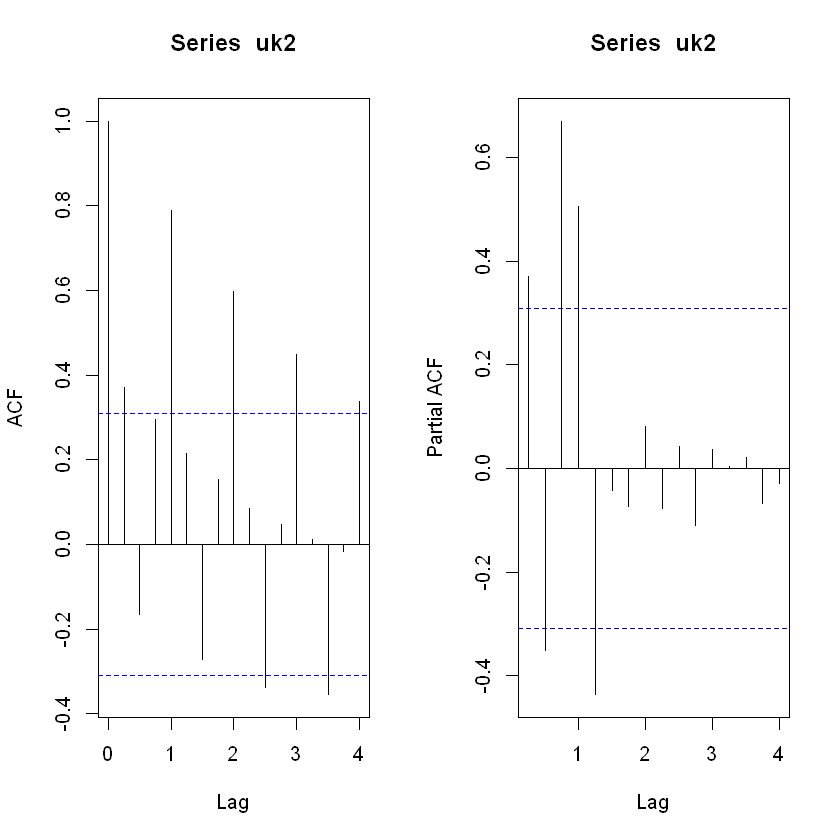

In [33]:
par(mfrow=c(1,2)) 

acf(uk2,plot=TRUE)
pacf(uk2,plot=TRUE)


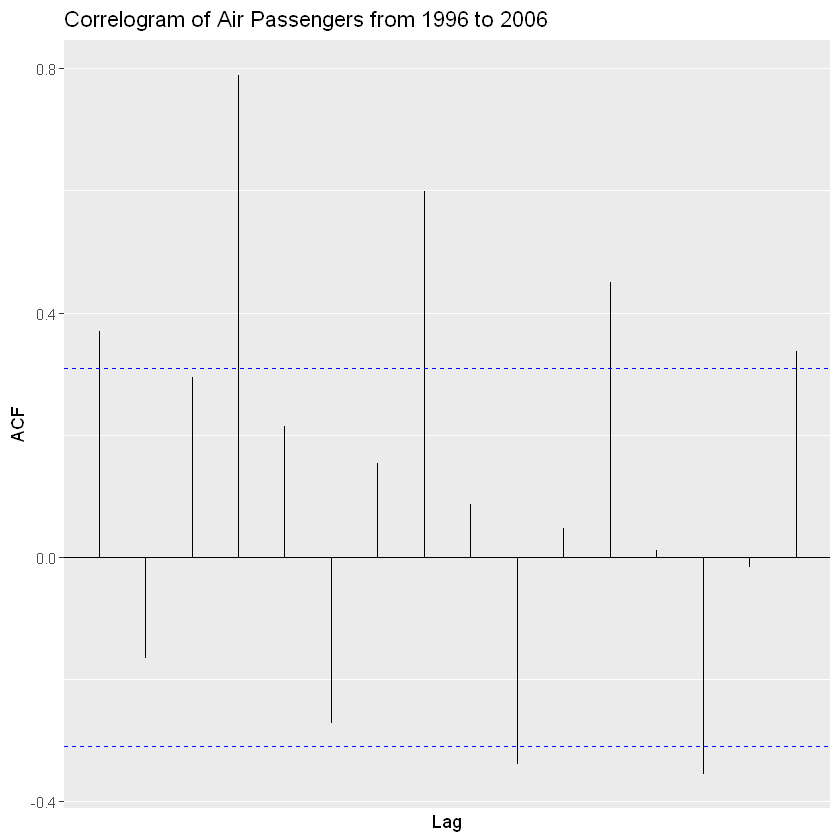

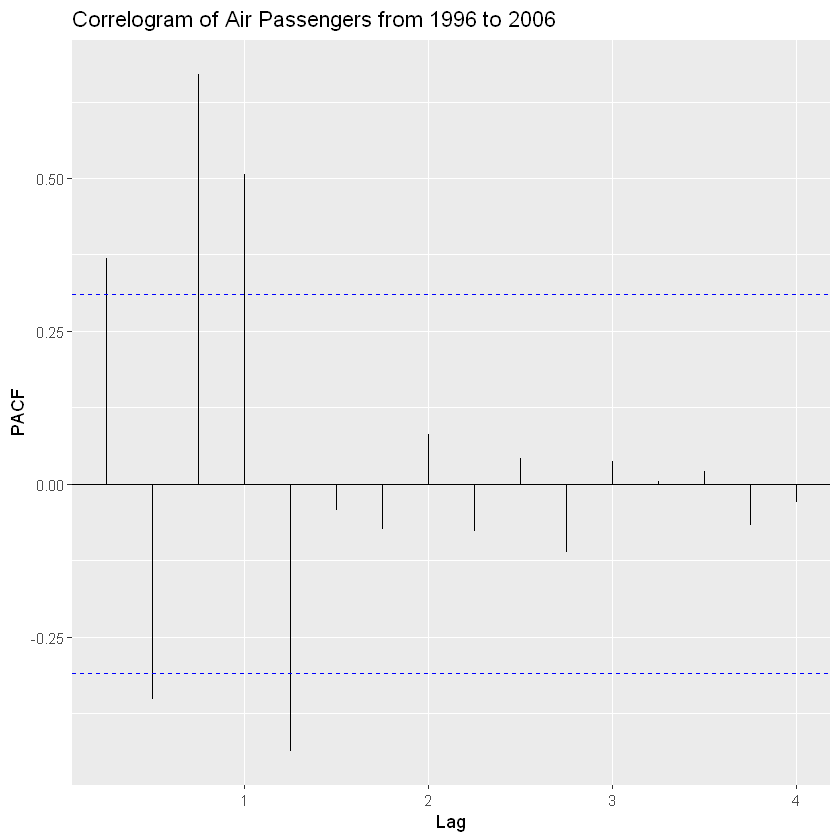

In [34]:

par(mfrow=c(1,2)) 

autoplot(acf(uk2,plot=FALSE))+ labs(title="Correlogram of Air Passengers from 1996 to 2006") 
autoplot(pacf(uk2,plot=FALSE))+ labs(title="Correlogram of Air Passengers from 1996 to 2006") 


#### Conclusion

    The above ACF is “decaying”, or decreasing, gradually, and remains well above the significance range (dotted blue lines). This is indicative of a non-stationary series.

### Convert to Stationary Data

Always keep in mind that in order to use time series forecasting models, it is necessary to convert any non-stationary series to a stationary series first.

 

### 1. Difference data to make data stationary on mean (remove Trend)

A way to make a time series stationary is to find the difference across its consecutive values. This helps stabilize the mean, thereby making the time-series object stationary.

This to remove the upward trend through 1st order differencing the series using the following formula:

    1st Differencing (d=1)	 Y(t)'=Y(t) -Y(t-1) 

In [35]:
tsDiff <- diff(uk2,lag=1)

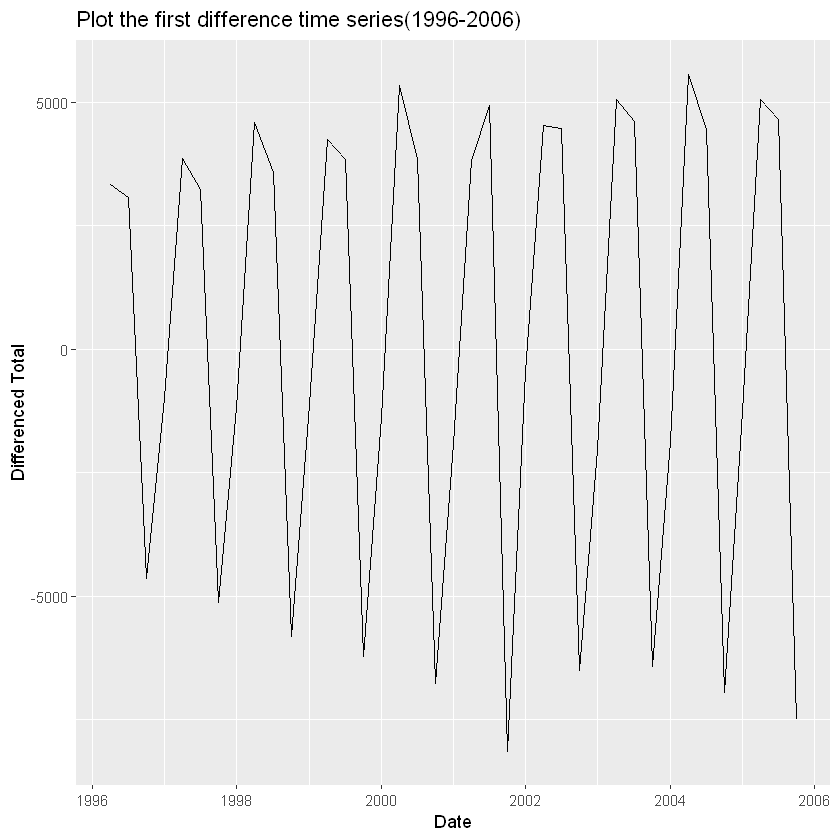

In [36]:
ggplot2::autoplot(tsDiff) + labs(x ="Date", y = "Differenced Total", title="Plot the first difference time series(1996-2006)") 

### Test for Stationarity

Let's apply the same tests to our differenced time-series object:

#### Augmented Dickey-Fuller Test

    The null hypothesis H0 : that the time series is non stationary
    The alternative hypothesis HA : that the time series is stationary

In [37]:
adf.test(tsDiff) 


	Augmented Dickey-Fuller Test

data:  tsDiff
Dickey-Fuller = -3.1895, Lag order = 3, p-value = 0.1075
alternative hypothesis: stationary


#### Test stationarity by Kwiatkowski–Phillips–Schmidt–Shin (KPSS) Test

    The Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test figures out if a time series is stationary around a mean or linear trend, or is non-stationary due to a unit root. A stationary time series is one where statistical properties — like the mean and variance — are constant over time.

    H0: The null hypothesis for the test is that the data is stationary.
    Ha: The alternate hypothesis for the test is that the data is not stationary.

In [38]:
kpss.test(tsDiff)


	KPSS Test for Level Stationarity

data:  tsDiff
KPSS Level = 0.46619, Truncation lag parameter = 3, p-value = 0.04928


### Conclusion 

    Okay so the above series is not stationary on variance i.e. variation in the plot is increasing as we move towards the 
    right of the chart. We need to make the series stationary on variance to produce reliable forecasts through ARIMA models.
    Anyway to confirm our interpretation we also ran the standard Stationarity tests on the differenced data. Basically, after data differencing the series is still not stationary as per the statistical tests.


### 2. Log transform data to make data stationary on variance(remove Seasonality)

We will go back to our original time series and log transform it to make it stationary on variance. The following equation represents the process of log transformation mathematically:

    Log of Total	 Y(t)(new)=log10Y(t)

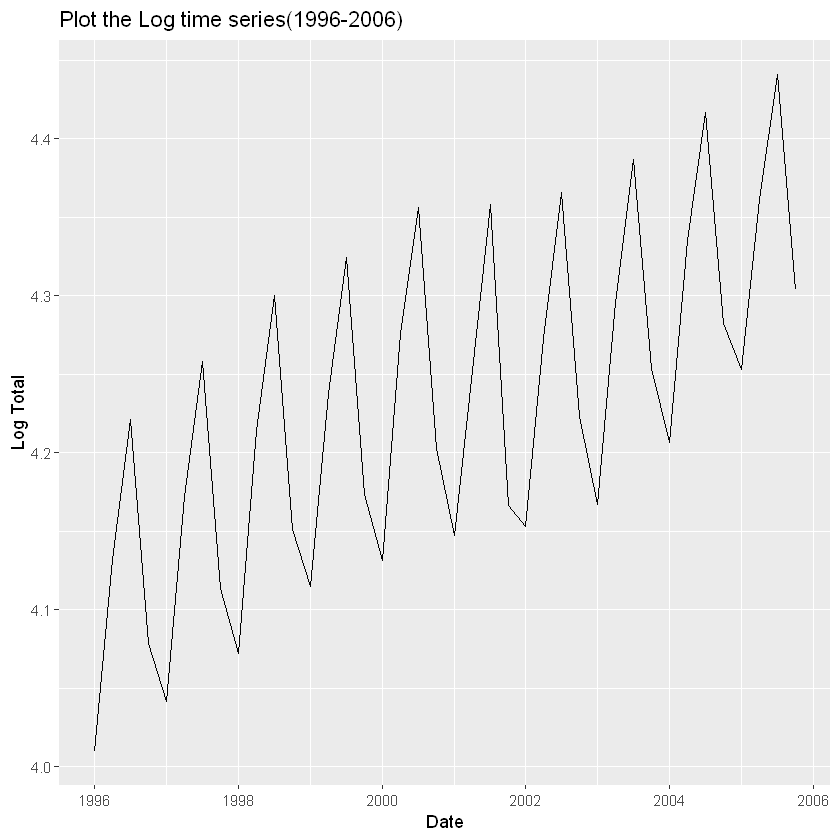

In [39]:
tsLog <- log10(uk2)
ggplot2::autoplot(tsLog) + labs(x ="Date", y = "Log Total", title="Plot the Log time series(1996-2006)") 

### Test for Stationarity
    Let's apply the same tests to our differenced time-series object:

#### Augmented Dickey-Fuller Test
    The null hypothesis H0 : that the time series is non stationary
    The alternative hypothesis HA : that the time series is stationary

In [40]:
adf.test(tsLog)


	Augmented Dickey-Fuller Test

data:  tsLog
Dickey-Fuller = -1.5783, Lag order = 3, p-value = 0.739
alternative hypothesis: stationary


#### Test stationarity by Kwiatkowski–Phillips–Schmidt–Shin (KPSS) Test

    The Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test figures out if a time series is stationary around a mean or linear trend, or is non-stationary due to a unit root. A stationary time series is one where statistical properties — like the mean and variance — are constant over time.

    H0: The null hypothesis for the test is that the data is stationary.
    Ha: The alternate hypothesis for the test is that the data is not stationary.

In [41]:
kpss.test(tsLog)

Warning message in kpss.test(tsLog):
"p-value smaller than printed p-value"


	KPSS Test for Level Stationarity

data:  tsLog
KPSS Level = 1.0708, Truncation lag parameter = 3, p-value = 0.01


### Conclusion

    Now from the plot of log, the series looks stationary on variance. So seasonality is removed. Notice, this series is not stationary on mean(there is upward trend) since we are using the original data without differencing.
    Therefore, fromz statistical tests the data is still not stationary.


### 3. Difference log transform data to make data stationary on both mean and variance

    Let us look at the differenced plot for log transformed series to reconfirm if the series is actually stationary on both mean and variance.
   
    1st Differencing (d=1) of log of sales  Y(t}(new)=log10.Y(t) - log10.Y(t-1) 

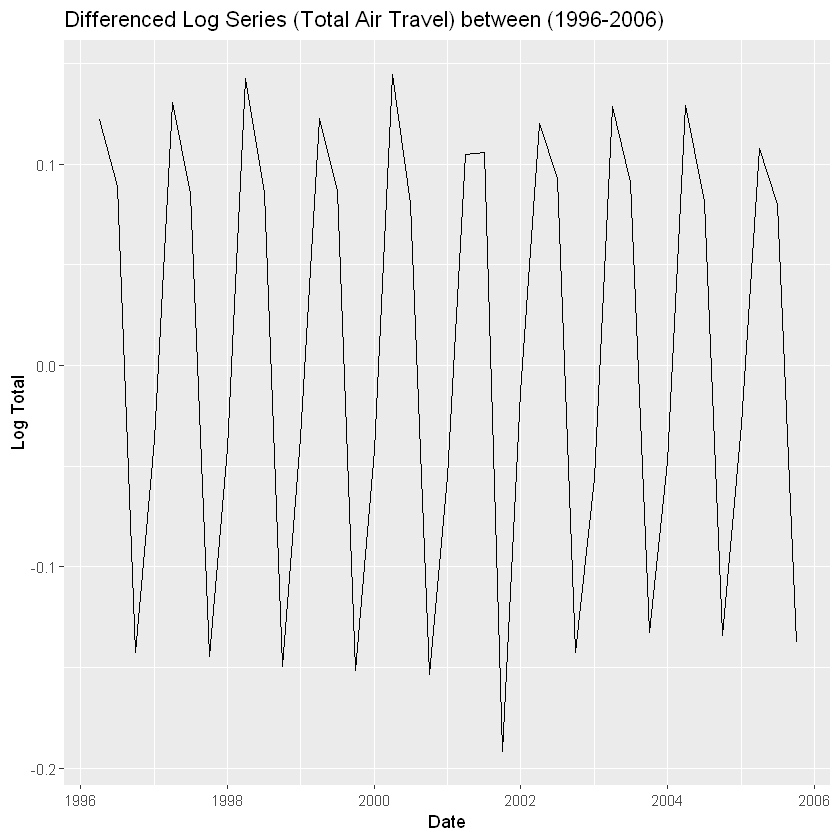

In [42]:
tsDiffLog <- diff(log10(uk2),lag=1)
ggplot2::autoplot(tsDiffLog) + labs(x ="Date", y = "Log Total", title="Differenced Log Series (Total Air Travel) between (1996-2006)") 

### Test for Stationarity

Let's apply the same tests to our differenced time-series object:

#### Augmented Dickey-Fuller Test

    The null hypothesis H0 : that the time series is non stationary
    The alternative hypothesis HA : that the time series is stationary

In [43]:
adf.test(tsDiffLog)


	Augmented Dickey-Fuller Test

data:  tsDiffLog
Dickey-Fuller = -3.3776, Lag order = 3, p-value = 0.07511
alternative hypothesis: stationary


#### Test stationarity by Kwiatkowski–Phillips–Schmidt–Shin (KPSS) Test
    The Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test figures out if a time series is stationary around a mean or linear trend, or is non-stationary due to a unit root. A stationary time series is one where statistical properties — like the mean and variance — are constant over time.

    H0: The null hypothesis for the test is that the data is stationary.
    Ha: The alternate hypothesis for the test is that the data is not stationary.

In [44]:
kpss.test(tsDiffLog)


	KPSS Test for Level Stationarity

data:  tsDiffLog
KPSS Level = 0.52028, Truncation lag parameter = 3, p-value = 0.0371


### Conclusion

    Now from the plot of differenced log, the series looks stationary on mean and variance. Most of the trend and seasonality is removed.
    Still, from statistical tests the data is not yet stationary.

#### Let's try lags=3 since its quarterly data

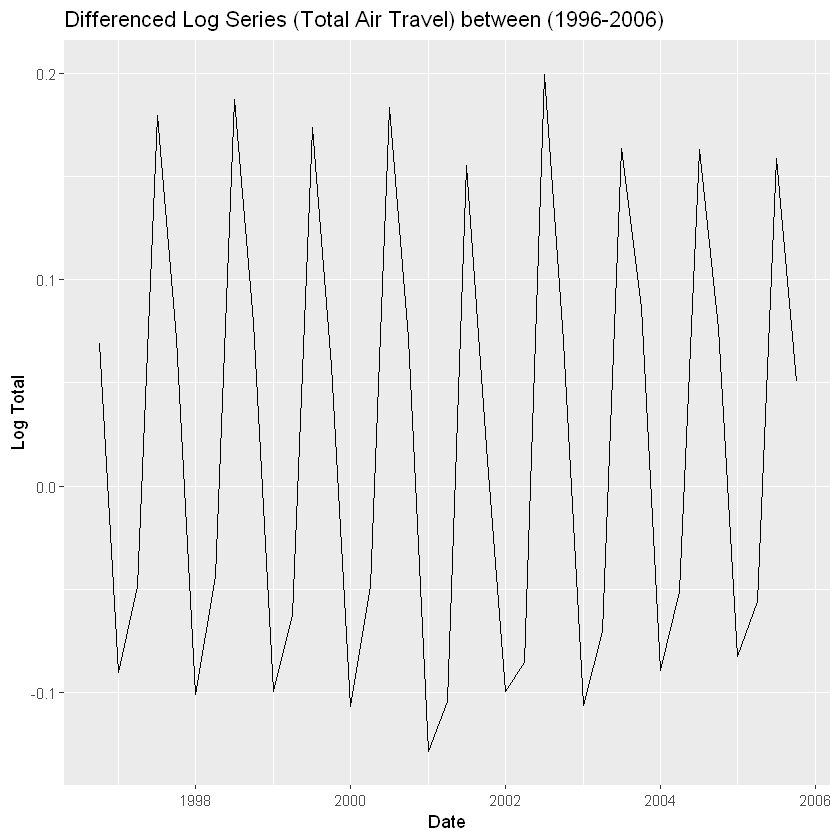

In [45]:
tsDiffLog <- diff(log10(uk2),lag=3)
ggplot2::autoplot(tsDiffLog) + labs(x ="Date", y = "Log Total", title="Differenced Log Series (Total Air Travel) between (1996-2006)") 

### Statistical Tests

In [46]:
adf.test(tsDiffLog)
kpss.test(tsDiffLog)


	Augmented Dickey-Fuller Test

data:  tsDiffLog
Dickey-Fuller = -1.5083, Lag order = 3, p-value = 0.7649
alternative hypothesis: stationary


Warning message in kpss.test(tsDiffLog):
"p-value greater than printed p-value"


	KPSS Test for Level Stationarity

data:  tsDiffLog
KPSS Level = 0.31532, Truncation lag parameter = 3, p-value = 0.1


### Conclusion

The series looks stationary on mean and variance. Most of the trend and seasonality is removed.
From KPSS statistical test the data is stationary.

### Forecasting methods

    Now, once you have checked for the stationarity, we can go onto the next stage of forecasting future observations. There are many forecasting methods but in this blog, we will be discussing the following:

    The average method
    Naïve method
    Seasonal naïve method
    ARIMA
    SARIMA

### ARIMA

    ARIMA stands for auto-regressive integrated moving average and is specified by these three order parameters: (p, d, q). The process of fitting an ARIMA model is sometimes referred to as the Box-Jenkins method. For ARIMA, we need three variables: p, d, and q which are non-negative integers that refer to the order of the autoregresion.
    
    ARIMA is a generalized version of ARMA (autoregressive moving average) process, where the ARMA process is applied for a differenced version of the data rather than original.

    Three numbers p, d and q specify ARIMA model and the ARIMA model is said to be of order (p,d,q). Here p, d and q are the orders of AR part, Difference and the MA part respectively.
    
    The time series analysis is based on the assumption that the underline time series is stationary or can make stationary by differencing it 1 or more times. This is known as the ARIMA (p, d, q) model where d denotes the number of times a time series has to be differenced to make it stationary. In most applications d = 1, i.e, we take only the first differences of the time series.

    Of course, if a time series is already stationary, then an ARIMA (p, d, q) becomes ARMA (p, q) model.



### Identifying the series structure includes the following two steps:

1. Categorizing the type of process (for example, AR, MA, and so on)
2. Once we have classified the process type, we need to identify the order of the process (for example, AR(1), AR(2), and so on)

### Plot ACF and PACF to identify potential AR and MA model

#### 1.Auto-regressive(AR)

    It implies relationship of a value of a series at a point of time with its own previous values. Such relationship can exist with any order of lag.

#### 2.Moving average(MA) 

    It implies the current deviation from mean depends on previous deviations. Such relationship can exist with any number of lags which decides the order of moving average. Moving Average is average of consecutive values at various time periods.


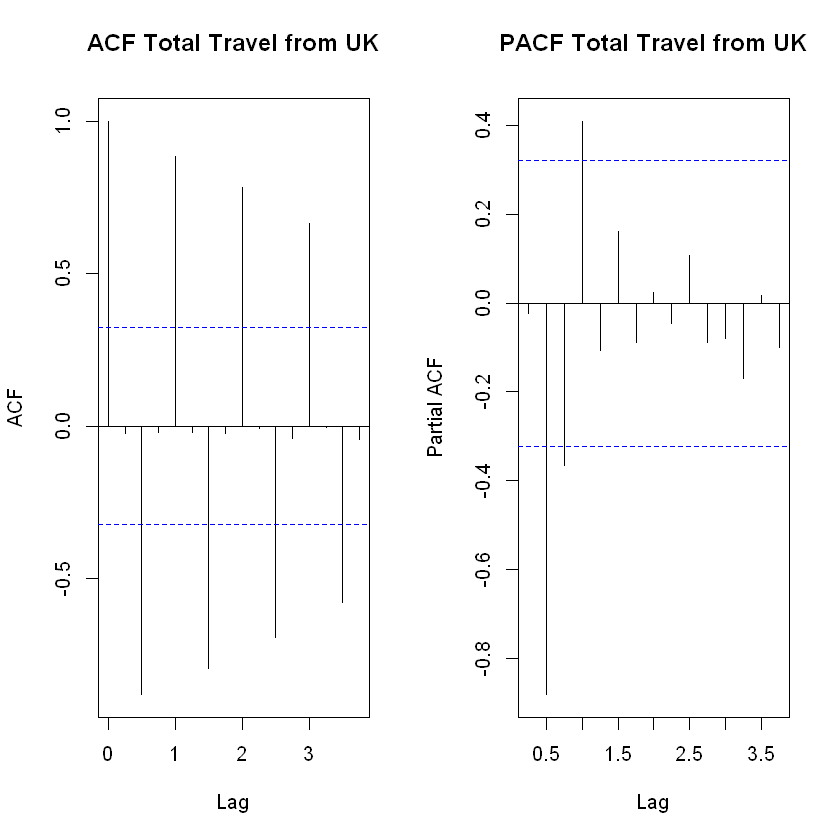

In [47]:
# To examine which p and q values will be appropriate we need to run acf() and pacf() function
par(mfrow = c(1,2))
acf(tsDiffLog,main='ACF Total Travel from UK')
pacf(tsDiffLog,main='PACF Total Travel from UK')

### Shape of acf() and pacf() to define values of p and q

    Looking at the graphs and going through the given table we can determine which type of the model to select and what will be the values of p, d and q.
    
    When looking to fit time series data with a seasonal ARIMA model, our first goal is to find the values of ARIMA(p,d,q)(P,D,Q)s that optimize a metric of interest. There are many guidelines and best practices to achieve this goal, yet the correct parametrization of ARIMA models can be a painstaking manual process that requires domain expertise and time. 
   

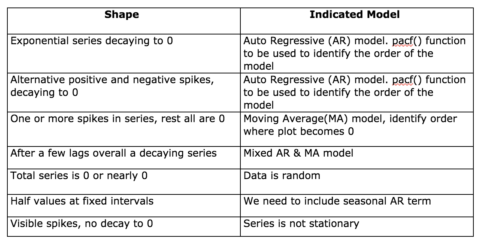

In this case, the ACF is an alternative plot with positive and negative spikes decaying to 0. The PACF graph cuts off at 4th lag.
Hence we will use the AR model with order 4.

Therefore, we will apply an ARIMA(4,1,0) model since the timeseries is 1st order differenced(d=1).

The ar function from the stats package allows us to fit an AR model on time series data and than forecast its future values. This function identifies the AR order automatically based on
the Akaike Information Criterion (AIC).

In [48]:
md_ar <- ar(tsDiffLog)
md_ar


Call:
ar(x = tsDiffLog)

Coefficients:
      1        2        3        4  
-0.2180  -0.5304  -0.2154   0.4096  

Order selected 4  sigma^2 estimated as  0.002181

The ar function was able to identify that the input series is a 4th order AR process.

#### The best fit model is selected based on Akaike Information Criterion (AIC) , and Bayesian Information Criterion (BIC) values. 
#### The idea is to choose a model with minimum AIC and BIC values.

### 1. ARIMA Model

In [49]:
ARIMAfit <- arima(log(uk2),order=c(4,1,0))

In [50]:
summary(ARIMAfit)


Call:
arima(x = log(uk2), order = c(4, 1, 0))

Coefficients:
          ar1      ar2      ar3     ar4
      -0.1632  -0.2165  -0.1563  0.7753
s.e.   0.0958   0.0974   0.0962  0.0976

sigma^2 estimated as 0.001694:  log likelihood = 64.31,  aic = -118.62

Training set error measures:
                     ME       RMSE        MAE       MPE      MAPE      MASE
Training set 0.01214762 0.04067064 0.03044307 0.1245276 0.3134819 0.1298247
                   ACF1
Training set -0.4559911


In [51]:
ARIMAfit$model

-1.776357e-15,2.230966e-16,-1.268080e-16,-7.987567e-17,1.807525e-15
1.592428e-17,2.016293e-16,-1.148215e-16,-7.956151e-17,-1.592428e-17
1.149971e-17,-2.934022e-16,8.103119e-16,-2.888062e-17,-1.149971e-17
-5.702944e-17,-4.419207e-17,-7.230636e-17,2.669204e-16,5.702944e-17
-7.356027e-17,-2.027334e-16,9.659400e-16,3.764638e-16,7.356027e-17
-0.1631660,1,0,0,0
-0.2164794,0,1,0,0
-0.1563304,0,0,1,0
0.7752750,0,0,0,0
1.0000000,0,0,0,1
1,0,0,0,0


In [52]:
ARIMAfit$series

[1] "log(uk2)"

      Qtr1  Qtr2  Qtr3  Qtr4
2006 18567 23731 28120 20546


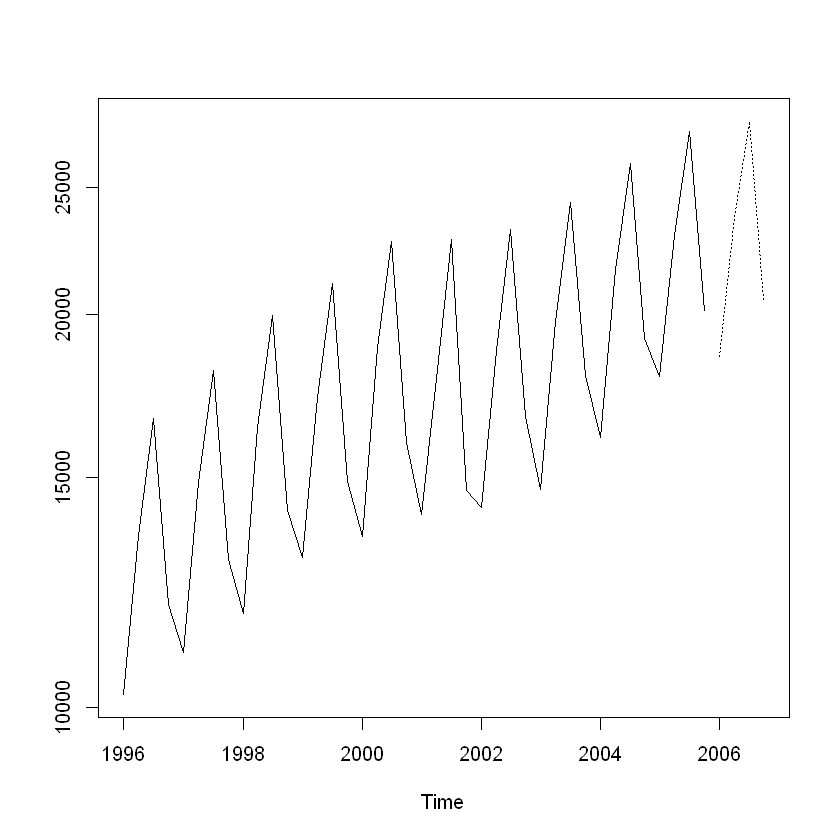

In [53]:
# Predict for 2006 all quarters to answer the problem statement

forecast <- predict(ARIMAfit, n.ahead=4)
ts.plot(uk2,2.718^forecast$pred, log = "y", lty = c(1,3)) 

print(round(2.718^forecast$pred))  

In [54]:
#Explanations for the ts.plot arguments provided:

#2.718^forecast$pred: we are  undoing the log from the values.In order to do that, we need to find the log inverse of what we have got.
#i.e. log(forecast) = forecast$pred
#hence, forecast = e ^ forecast$pred
#e= 2.718 
#log = "y' is to plot on a logarithmic scale
#lty = c(1,3) will set the LineTYpe to 1 (for solid) for the original time series and 3 (for dotted) for the predicted time series.
#print(pred$pred) would give us log of the predicted values. print(2.718^pred$pred) would give us the actual predicted values.

### Accuracy of ARIMA

    If x is provided, the function measures test set forecast accuracy based on x-f. 
    If x is not provided, the function only produces training set accuracy measures of the forecasts based on f["x"]-fitted(f)
    
    forecast::accuracy(f, x, test = NULL, d = NULL, D = NULL,)
    
#### The measures calculated are:

    ME: Mean Error

    RMSE: Root Mean Squared Error

    MAE: Mean Absolute Error

    MPE: Mean Percentage Error

    MAPE: Mean Absolute Percentage Error

    MASE: Mean Absolute Scaled Error

    ACF1: Autocorrelation of errors at lag 1.

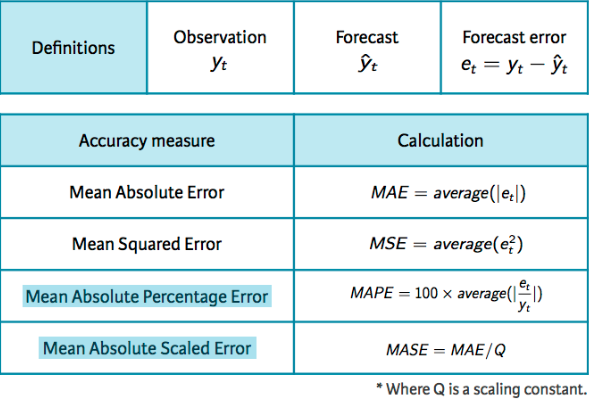

In [55]:
# Accuracy of the ARIMA model
forecast::accuracy(ARIMAfit)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.01214762,0.04067064,0.03044307,0.1245276,0.3134819,0.1298247,-0.4559911


### 2. Exponential Models

Both the HoltWinters() function in the base installation, and the ets() function in the forecast package, can be used to fit exponential models.
    

#### HoltWinters() in base R

In [56]:
# simple exponential - models level
fit_hw <- HoltWinters(uk2, beta=FALSE, gamma=FALSE)
# double exponential - models level and trend
fit_hw <- HoltWinters(uk2, gamma=FALSE)
# triple exponential - models level, trend, and seasonal components
fit_hw <- HoltWinters(uk2)
fit_hw

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = uk2)

Smoothing parameters:
 alpha: 0.4071134
 beta : 0
 gamma: 0.9978534

Coefficients:
         [,1]
a  22922.3105
b    311.5375
s1 -4224.0565
s2   541.4747
s3  4793.8089
s4 -2794.6254

In [57]:
summary(fit_hw)

             Length Class  Mode     
fitted       144    mts    numeric  
x             40    ts     numeric  
alpha          1    -none- numeric  
beta           1    -none- numeric  
gamma          1    -none- numeric  
coefficients   6    -none- numeric  
seasonal       1    -none- character
SSE            1    -none- numeric  
call           2    -none- call     

      Qtr1  Qtr2  Qtr3  Qtr4
2006 19010 24087 28651 21374


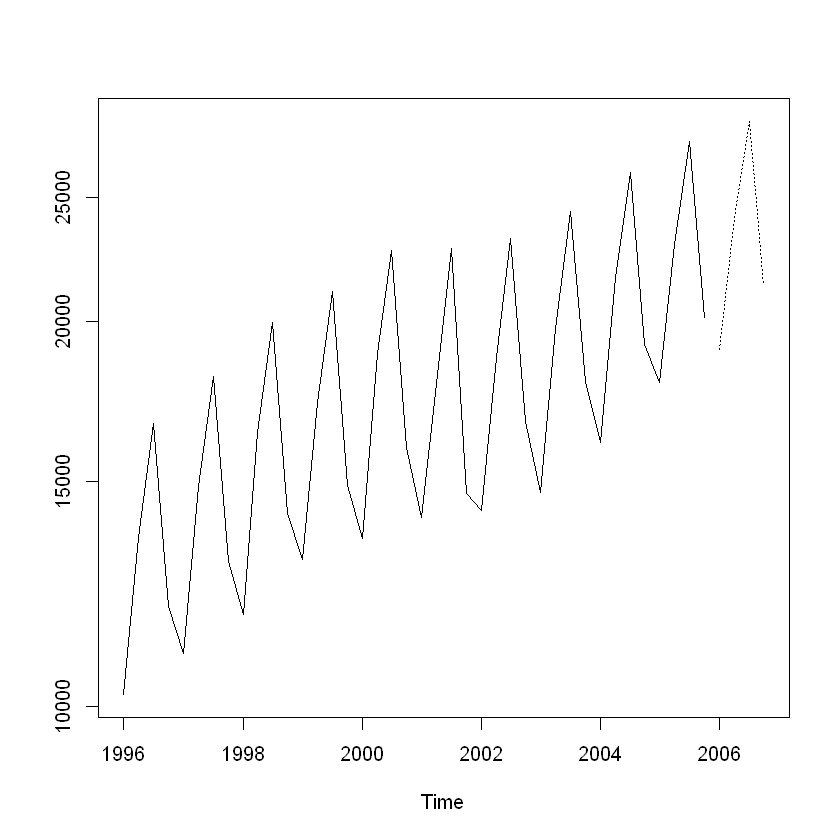

In [58]:
# Predict for all quarters of 2004 and 2005 for accuracy comparison with uk2_test dataset
# Predict for 2006 Q1 and Q2 to answer the problem

forecast <- predict(fit_hw, n.ahead=4)
ts.plot(uk2,forecast, log = "y", lty = c(1,3)) 

print(round(forecast))

### Accuracy of Holt Winters

In [59]:
forecast::accuracy(fit_hw$fitted, uk2)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-79.03984,610.3926,474.5054,-0.6824134,2.917488,0.002905161,0.1467941


#### ETS() in forecast package

In [60]:
fit_ets <- ets(uk2)
summary(fit_ets)

ETS(M,A,M) 

Call:
 ets(y = uk2) 

  Smoothing parameters:
    alpha = 0.5339 
    beta  = 0.0042 
    gamma = 1e-04 

  Initial states:
    l = 12611.067 
    b = 292.6913 
    s = 0.888 1.2654 1.0491 0.7976

  sigma:  0.0284

     AIC     AICc      BIC 
651.4272 657.4272 666.6271 

Training set error measures:
                    ME     RMSE      MAE        MPE    MAPE      MASE
Training set -70.83687 444.9536 304.2904 -0.4838512 1.75779 0.2683008
                    ACF1
Training set 0.002191918


        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2006 Q1       18193.29 17530.75 18855.83 17180.03 19206.55
2006 Q2       24223.19 23224.10 25222.28 22695.22 25751.16
2006 Q3       29573.43 28226.92 30919.93 27514.13 31632.73
2006 Q4       21002.51 19964.62 22040.40 19415.20 22589.82


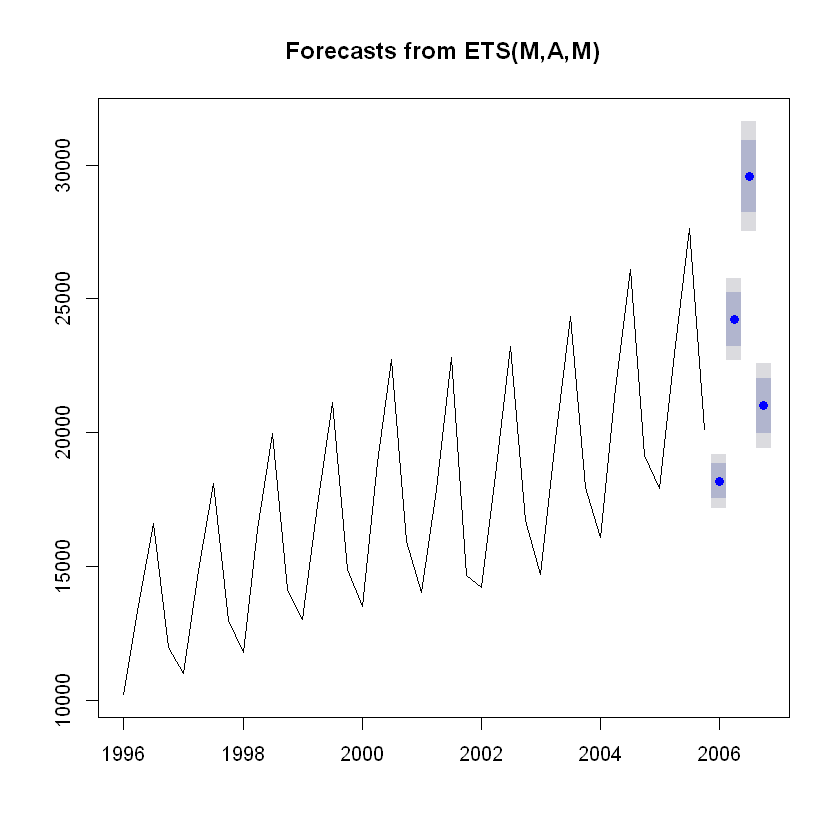

In [61]:
# Predict for 2006 all quarters to answer the problem

fcast <- forecast(fit_ets, h=4)
plot(fcast)
print((fcast)) 

### Accuracy of ETS

In [62]:
forecast::accuracy(fcast)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-70.83687,444.9536,304.2904,-0.4838512,1.75779,0.2683008,0.002191918


### 3. TBATS  model

    The TBATS model combines several components of the already discussed techniques in this guide, making them a very good choice for forecasting.

    It constitutes the following elements:

    T: Trigonometric terms for seasonality
    B: Box-Cox transformations for heterogeneity
    A: ARMA errors for short-term dynamics
    T: Trend
    S: Seasonal (including multiple and non-integer periods)

In [63]:
model_tbats <- tbats(uk2)
summary(model_tbats)

                  Length Class  Mode     
lambda              1    -none- numeric  
alpha               1    -none- numeric  
beta                1    -none- numeric  
damping.parameter   1    -none- numeric  
gamma.one.values    1    -none- numeric  
gamma.two.values    1    -none- numeric  
ar.coefficients     1    -none- numeric  
ma.coefficients     2    -none- numeric  
likelihood          1    -none- numeric  
optim.return.code   1    -none- numeric  
variance            1    -none- numeric  
AIC                 1    -none- numeric  
parameters          2    -none- list     
seed.states         7    -none- numeric  
fitted.values      40    ts     numeric  
errors             40    ts     numeric  
x                 280    -none- numeric  
seasonal.periods    1    -none- numeric  
k.vector            1    -none- numeric  
y                  40    ts     numeric  
p                   1    -none- numeric  
q                   1    -none- numeric  
call                2    -none- ca

In [64]:
for_tbats <- forecast::forecast(model_tbats, h = 4)
df_tbats = as.data.frame(for_tbats)
df_tbats
print(df_tbats$`Point Forecast`)

,Point Forecast,Lo 80,Hi 80,Lo 95,Hi 95
2006 Q1,18190.23,17544.73,18855.89,17211.02,19216.61
2006 Q2,23885.51,22963.85,24838.56,22488.37,25356.09
2006 Q3,28517.10,27151.46,29940.95,26451.42,30718.95
2006 Q4,20629.41,19496.12,21818.47,18918.02,22471.26


[1] 18190.23 23885.51 28517.10 20629.41


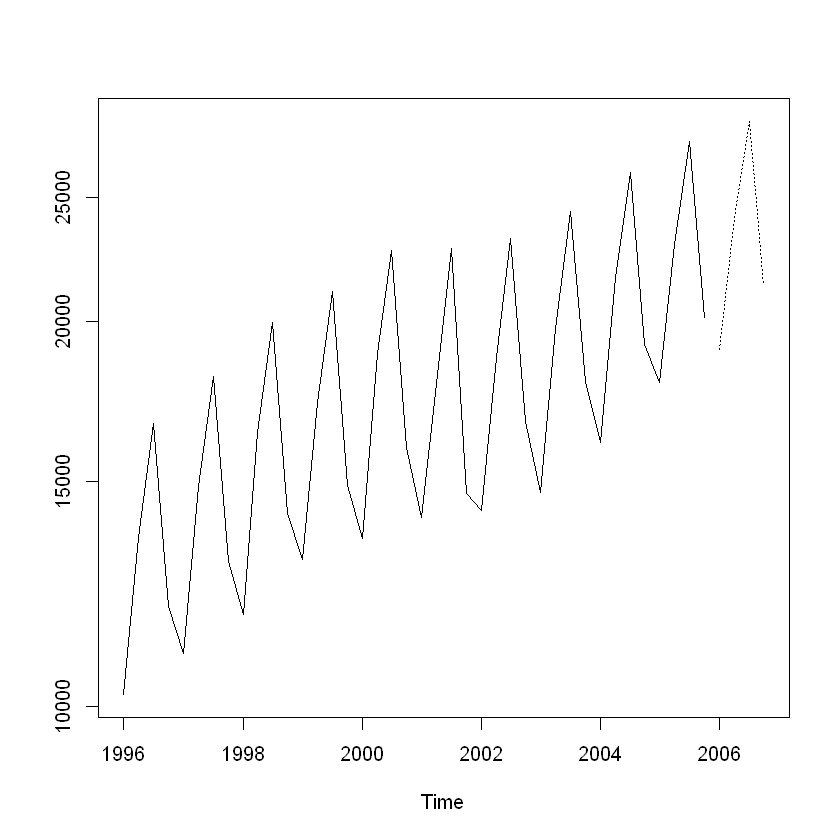

In [65]:
ts.plot(uk2,forecast, log = "y", lty = c(1,3)) 

### Accuracy of TBATS


In [66]:
forecast::accuracy(model_tbats)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-48.15021,469.593,358.8853,-0.4577902,2.166992,0.08619348,-0.08737626


### 4. Auto ARIMA model

In [67]:
fit_auto <- auto.arima(uk2)
summary(fit_auto)

Series: uk2 
ARIMA(1,0,0)(0,1,0)[4] with drift 

Coefficients:
         ar1     drift
      0.4548  250.2320
s.e.  0.1446   46.7407

sigma^2 estimated as 414238:  log likelihood=-282.98
AIC=571.97   AICc=572.72   BIC=576.72

Training set error measures:
                   ME    RMSE      MAE        MPE     MAPE      MASE       ACF1
Training set 4.292192 593.382 411.2786 -0.1773039 2.429914 0.3626351 -0.1052545


### Accuracy of Auto ARIMA

In [68]:
accuracy(fit_auto)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,4.292192,593.382,411.2786,-0.1773039,2.429914,0.3626351,-0.1052545


        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2006 Q1       18895.49 18070.67 19720.32 17634.03 20156.95
2006 Q2       23962.63 23056.50 24868.77 22576.82 25348.44
2006 Q3       28620.70 27698.64 29542.76 27210.53 30030.87
2006 Q4       21126.01 20200.69 22051.32 19710.85 22541.16


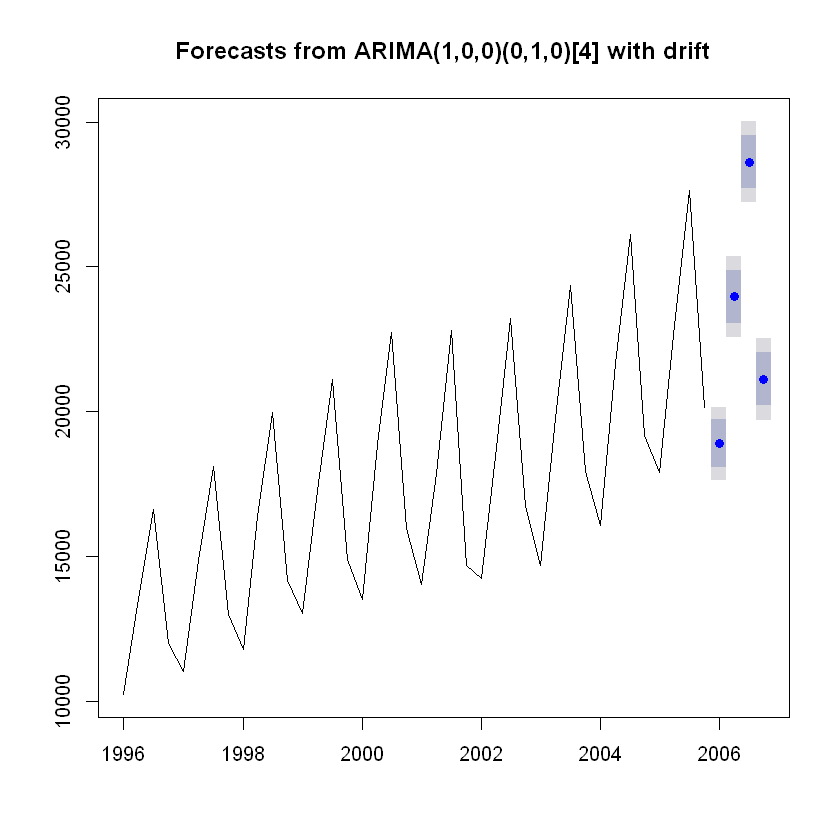

In [69]:
# Predict for 2006 all quarters to answer the problem

fcast_a <- forecast(fit_auto, h=4)
plot(fcast_a)
print((fcast_a)) 

### Compare the MAPE of all the models

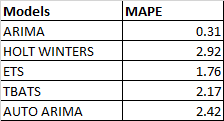

Comparing the MAPE of all the timeseries forecasting models, we find that the ARIMA gives the least MAPE.

### Save the final model

In [70]:
print(round(forecast)) 
saveRDS(ARIMAfit, "C:\\Data_Science\\Certifications\\AnalytixLabs\\Data Science in R\\Data Science with R - Final Projects\\Time Series Forecast -  UK Air Travel\\TimeSeriesForecast-ARIMA.rda")

      Qtr1  Qtr2  Qtr3  Qtr4
2006 19010 24087 28651 21374
